<a href="https://colab.research.google.com/github/REILLLx/new/blob/master/Kaushan_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Мета
Ваше завдання передбачити, чи вижив пасажир під час катастрофи Титаніка чи ні. Для кожного з тестів ви повинні передбачити значення змінної 0 або 1.

# Опис датасету

     survival - Survival - Вижив (0 or 1)

     pclass - Ticket class - Клас квитка (1 = 1st, 2 = 2nd, 3 = 3rd)
     Indicator of socio-economic status
     1 = Upper
     2 = Average
     3 = Lower

     sex - Gender - Стать

     Age - Age in years - Вік

     Якщо значення віку менше 1, то це значення представляється у вигляді десяткового дробу
      Якщо вік орієнтовний або приблизний, то він буде записаний як xx.5.
     Наприклад, якщо вік оцінюється як 20 років, але точного значення немає, то буде написано 20,5.


     sibsp - Number of brothers and sisters / spouses on board - кількість братів і сестер пасажира

     parch - Number of parents/children on board кількість батьків/дітей на борту

     ticket - Ticket number номер квитка

     fare - Passenger fare - вартість квитка

     cabin - Cabin number - номер каюти

     embarked - Port of embarkation - порт посадки
                C = Cherbourg,
                Q = Queenstown,
                S = Southampton

# Підготовка середовища

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve, recall_score, precision_score
from sklearn.model_selection import cross_validate
from yellowbrick.classifier import ROCAUC

from sklearn.feature_selection import mutual_info_classif

from sklearn.pipeline import make_pipeline

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image, display
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import xgboost as XGB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
params = {'figure.figsize' : (16,10),
          'font.size' : 12,
          'axes.titlesize': 20}

bbox = {'boxstyle' : 'round',
        'pad' : 0.5,
        'facecolor' : 'white',
        'edgecolor' : 'black',
        'linewidth' : 1.5,
        'alpha' : 1}

matplotlib.rcParams.update(params)
%matplotlib inline

In [6]:
sns.color_palette()

[(0.00784313725490196, 0.4470588235294118, 0.6352941176470588),
 (0.6235294117647059, 0.7647058823529411, 0.4666666666666667),
 (0.792156862745098, 0.043137254901960784, 0.011764705882352941),
 (0.6470588235294118, 0.00784313725490196, 0.34509803921568627),
 (0.8431372549019608, 0.7803921568627451, 0.011764705882352941),
 (0.5333333333333333, 0.792156862745098, 0.8549019607843137)]

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/data/titanic/train.csv')

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Viewing data

In [10]:
df = df.drop('PassengerId', axis = 1)

In [11]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.shape

(891, 11)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [14]:
data = {
        'Not NaN' : df.notna().sum(),
        'NaN' : df.isna().sum(),
        '% NaN' : round((df.isna().sum() / df.shape[0])*100,2)
       }

data = pd.DataFrame(data)
data

,Not NaN,NaN,% NaN
Survived,891,0,0.00
Pclass,891,0,0.00
Name,891,0,0.00
Sex,891,0,0.00
Age,714,177,19.87
SibSp,891,0,0.00
Parch,891,0,0.00
Ticket,891,0,0.00
Fare,891,0,0.00
Cabin,204,687,77.10


In [15]:
df['Cabin'].value_counts()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


Є випадки, де вказано кілька кают. Це ознака заможніх, бронювання групи кают. Створимо такий параметр.

In [16]:
df['Count_Cabins'] = np.nan

In [17]:
df.loc[df['Cabin'].notna(),'Count_Cabins'] = df.loc[df['Cabin'].notna(),'Cabin'].apply(lambda x: len(x.split()))

In [18]:
df.Count_Cabins.value_counts()

,count
Count_Cabins,
1.0,180
2.0,16
3.0,6
4.0,2


In [19]:
df['Cabin'].str[0].value_counts()

,count
Cabin,
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1



Значення цього стовпця складаються з наступного формату (class_number каюти, в якому живе пасажир)
Відповідно, замінимо цей стовпець просто значеннями класу каюти (типу каюти),
оскільки унікальних значень менше, і після перетворення стовпця ми заповнимо порожні значення


In [20]:
df['Cabin'] = df['Cabin'].str[0]

In [21]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Count_Cabins
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [23]:
df['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
df['Name'].apply(lambda x: x.split(", ")[1].split(".")[0]).value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Name, dtype: int64

    'Mr' is an abbreviation of the English word "Mister" and is used as a form of polite address to an adult man.

    'Miss' is a title that is usually used to address an unmarried woman or girl.

    'Mrs' is an abbreviation of the English word "Mistress" and is used to address a married woman.

    'Master' is a title that is used to refer to a boy or young man under the age of adolescence or adulthood.

    'Dr' is an abbreviation of the English word "Doctor" and is used to refer to a person with a doctorate degree, for example, a doctor or academic.

    'Rev' is an abbreviation of the English word "Reverend" and is used to address a clergyman, such as a priest or deacon.

    'Mlle' is an abbreviation of the French word "Mademoiselle" and is used to refer to an unmarried woman or girl in French.

    'Major' is a title used to address senior officers in the army or military forces.

    'Col' is an abbreviation of the English word "Colonel" and is used to refer to the highest-ranking officer in the army or military forces.

    'the Countess' is a title that denotes a countess, wife or widow of an earl.

    'Capt' is an abbreviation of the English word "Captain" and is used to refer to an officer of the Navy or the commander of a ship.

    'Ms' is a form of address to a woman who does not indicate her marital status (regardless of whether she is married or not).

    'Sir' is a form of polite address to a man, which is used when you want to express respect or when addressing a person of high status or authority.

    'Lady' is a title that is used to refer to a woman of lower noble origin or the daughter of an earl.

    'Mme' is an abbreviation of the French word "Madame" and is used to address a married woman in French.

    'Don' is a title used to refer to a man of lower noble origin or the owner of a land holding in Spanish-speaking countries.

    'Jonkheer' is the lowest title of the lowest aristocratic level used in the Netherlands and some other countries.

In [ ]:
df['Name'] = df['Name'].apply(lambda x: x.split(", ")[1].split(".")[0])

In [ ]:
df['Count'] = df['Ticket'].apply(lambda x: len(x.split()))

In [ ]:
df.loc[df['Count']>1,'Ticket'] = df.loc[df['Count']>1,'Ticket'].apply(lambda x: x.split()[1])

In [ ]:
df = df.drop('Count', axis = 1)

In [ ]:
df = df.rename(columns={'Name': 'Status',
                        'Cabin': 'Cabin Type',
                        'Ticket':'Number_Ticket'})

In [ ]:
df.head()

,Survived,Pclass,Status,Sex,Age,SibSp,Parch,Number_Ticket,Fare,Cabin Type,Embarked,Count_Cabins
0,0,3,Mr,male,22.0,1,0,21171,7.2500,NaN,S,NaN
1,1,1,Mrs,female,38.0,1,0,17599,71.2833,C,C,1.0
2,1,3,Miss,female,26.0,0,0,3101282,7.9250,NaN,S,NaN
3,1,1,Mrs,female,35.0,1,0,113803,53.1000,C,S,1.0
4,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [ ]:
df.dtypes

Survived           int64
Pclass             int64
Status            object
Sex               object
Age              float64
SibSp              int64
Parch              int64
Number_Ticket     object
Fare             float64
Cabin Type        object
Embarked          object
Count_Cabins     float64
dtype: object

In [ ]:
df.loc[df['Number_Ticket'] == '2.', 'Number_Ticket'] = 2

In [ ]:
df.loc[df['Number_Ticket'] == 'LINE', 'Number_Ticket'] = 0

In [ ]:
df.loc[df['Number_Ticket'] == 'Basle', 'Number_Ticket'] = 0

In [ ]:
df['Number_Ticket'] = df['Number_Ticket'].astype('int')

In [ ]:
df.dtypes

Survived           int64
Pclass             int64
Status            object
Sex               object
Age              float64
SibSp              int64
Parch              int64
Number_Ticket      int64
Fare             float64
Cabin Type        object
Embarked          object
Count_Cabins     float64
dtype: object

In [ ]:
# Кількість значень NaN
data = {
        'Not NaN' : df.notna().sum(),
        'NaN' : df.isna().sum(),
        '% NaN' : round((df.isna().sum() / df.shape[0])*100,2)
       }

data = pd.DataFrame(data)
data

,Not NaN,NaN,% NaN
Survived,891,0,0.00
Pclass,891,0,0.00
Status,891,0,0.00
Sex,891,0,0.00
Age,714,177,19.87
SibSp,891,0,0.00
Parch,891,0,0.00
Number_Ticket,891,0,0.00
Fare,891,0,0.00
Cabin Type,204,687,77.10


In [ ]:
df.head()

,Survived,Pclass,Status,Sex,Age,SibSp,Parch,Number_Ticket,Fare,Cabin Type,Embarked,Count_Cabins
0,0,3,Mr,male,22.0,1,0,21171,7.2500,NaN,S,NaN
1,1,1,Mrs,female,38.0,1,0,17599,71.2833,C,C,1.0
2,1,3,Miss,female,26.0,0,0,3101282,7.9250,NaN,S,NaN
3,1,1,Mrs,female,35.0,1,0,113803,53.1000,C,S,1.0
4,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,NaN


# EDA

In [ ]:
# Червоні - загиблі, зелені - ті, що вижили

palette  = ['#ff0000','#008000']
sns.color_palette(palette)

[(1.0, 0.0, 0.0), (0.0, 0.5019607843137255, 0.0)]

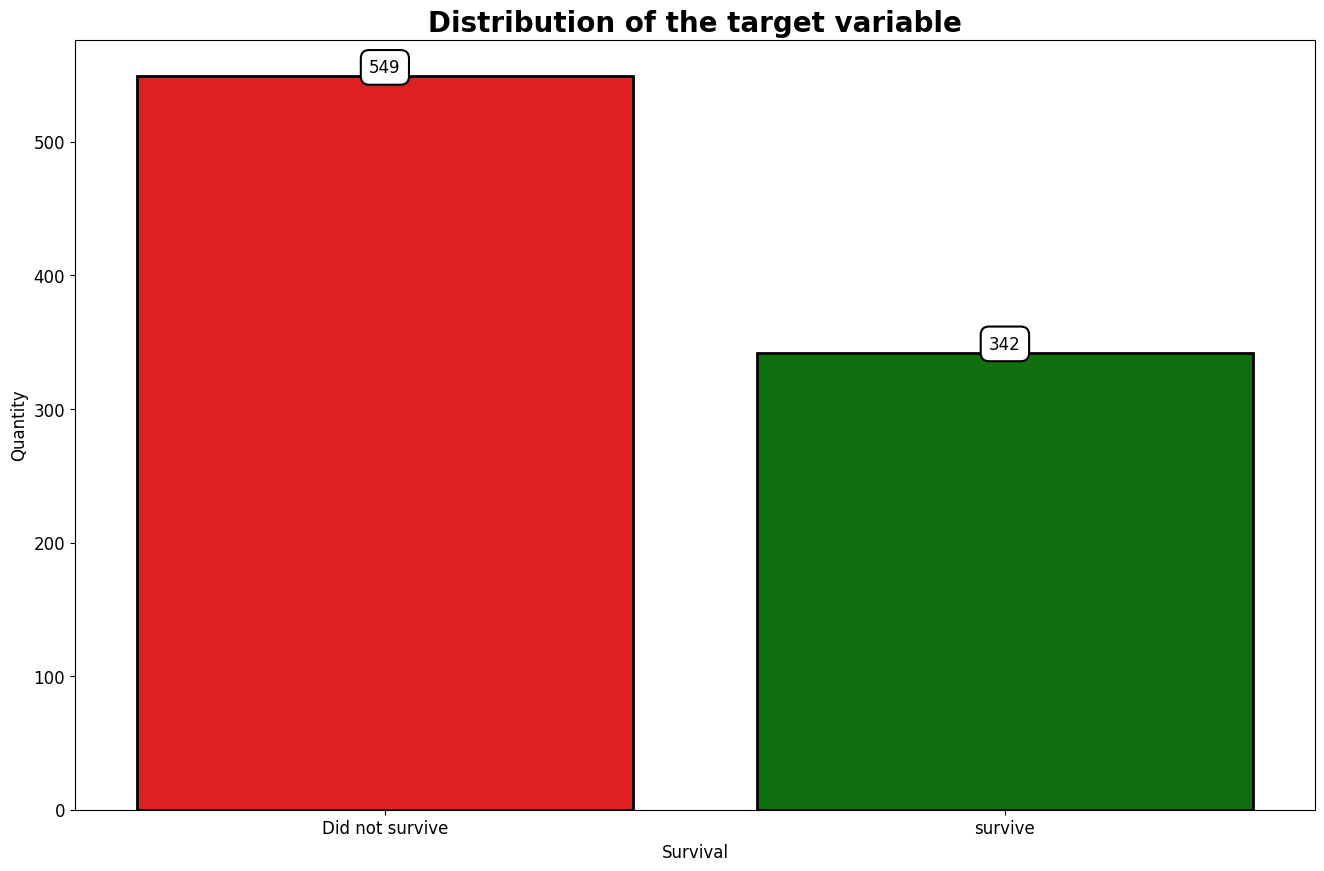

In [ ]:
fig = plt.subplots()
p1 = sns.countplot(data = df,
             x = 'Survived',
             palette = palette,
             edgecolor = 'black',
             linewidth = 2)
p1.bar_label(p1.containers[0], bbox = bbox)

plt.title('Distribution of the target variable', fontweight = 'bold')
plt.xlabel('Survival')
plt.ylabel('Quantity')
plt.xticks(ticks=[0, 1], labels=['Did not survive','survive'])

plt.show()

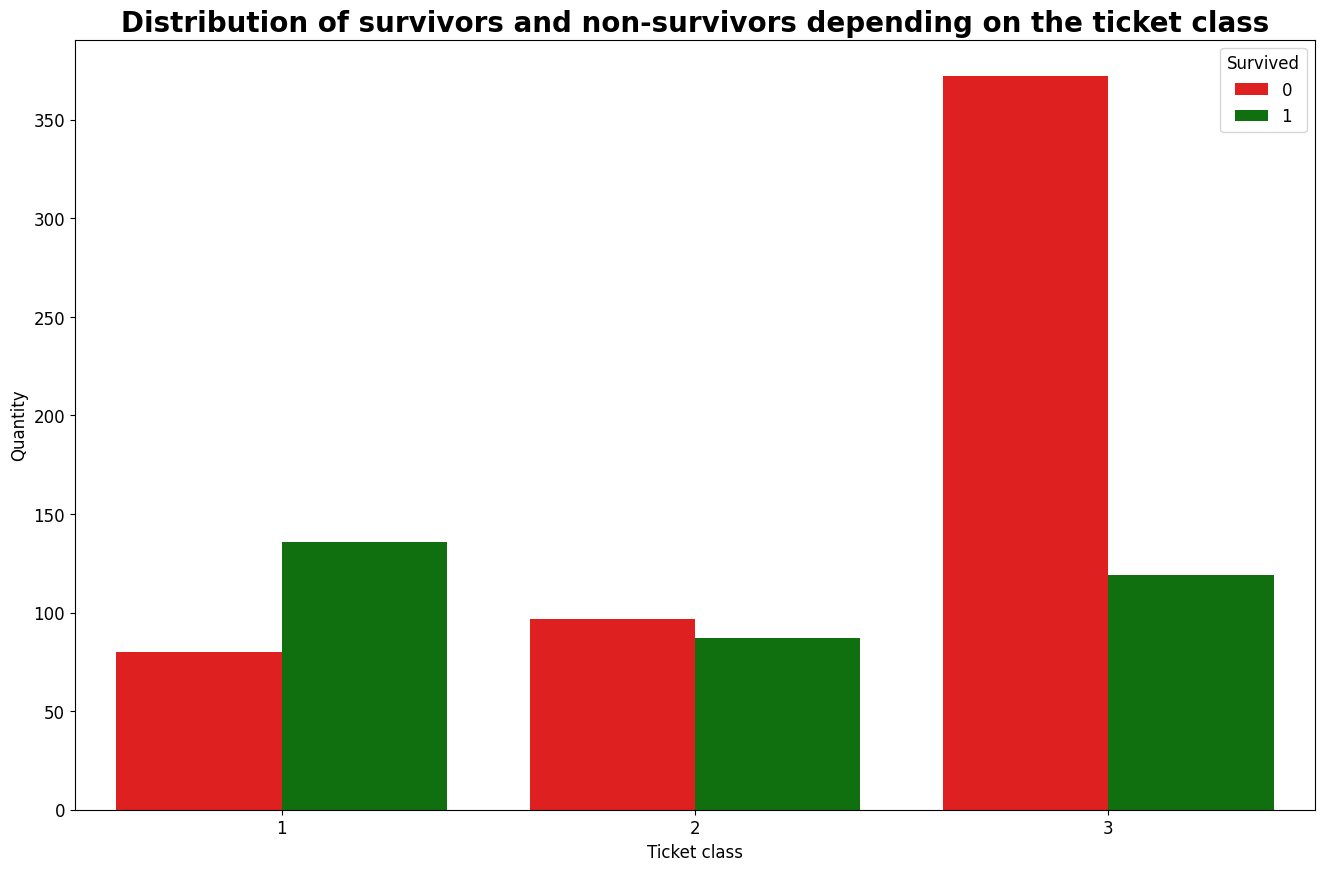

In [ ]:
sns.countplot(data = df,
             x = 'Pclass',
             hue = 'Survived',
             palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the ticket class',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Ticket class')
plt.show()

Серед тих, что був у третьому класі, більшість не вижили. І навпаки, серед тих, что був в 1 класі - більшість вижили.

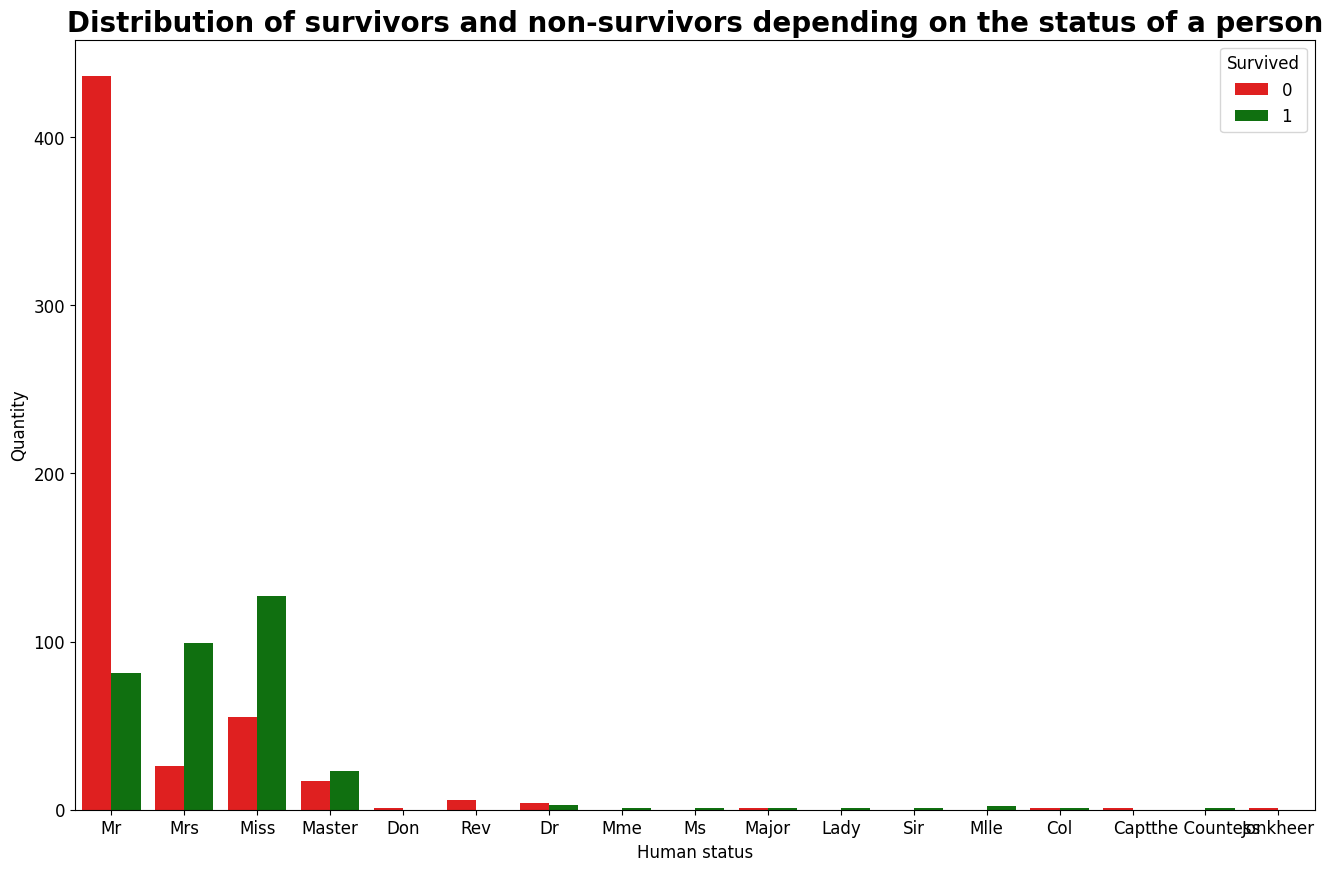

In [ ]:
sns.countplot(data = df,
             x = 'Status',
             hue = 'Survived',
             palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the status of a person',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Human status')
plt.show()

    Серед Mr, Dr - більшість загинули
    Серед Mrs, Miss, Master - більшість вижили

    Ніхто з Don, Rev, Capt,Jonkheer не вижив
    Вижили всі зі статусами Me,Ms,Lady,Sir,Mille,the Countess



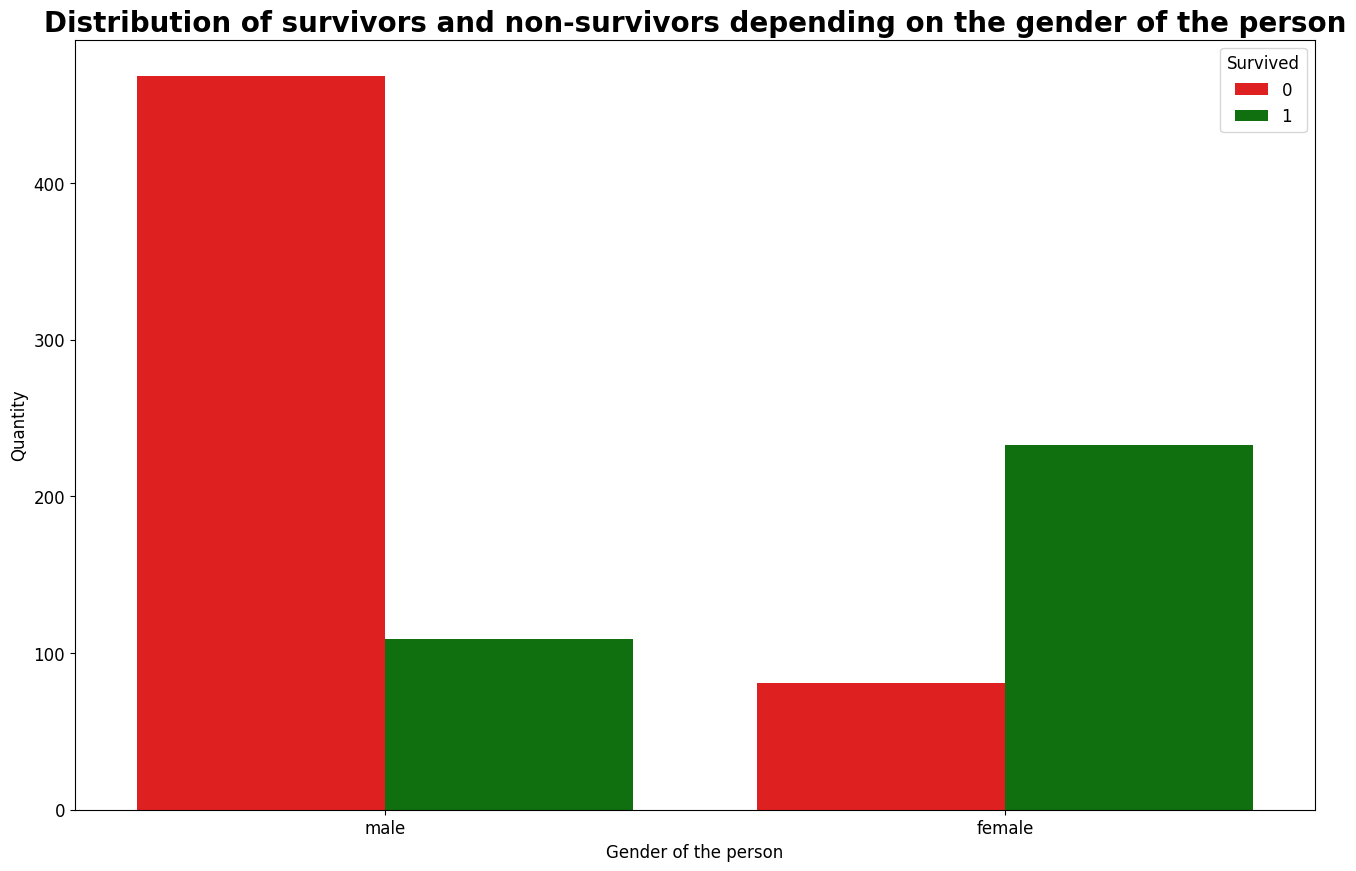

In [ ]:
sns.countplot(data = df,
             x = 'Sex',
             hue = 'Survived',
             palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the gender of the person',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Gender of the person')
plt.show()

Більшість чоловіків загинули, а більшість жінок врятувалася.


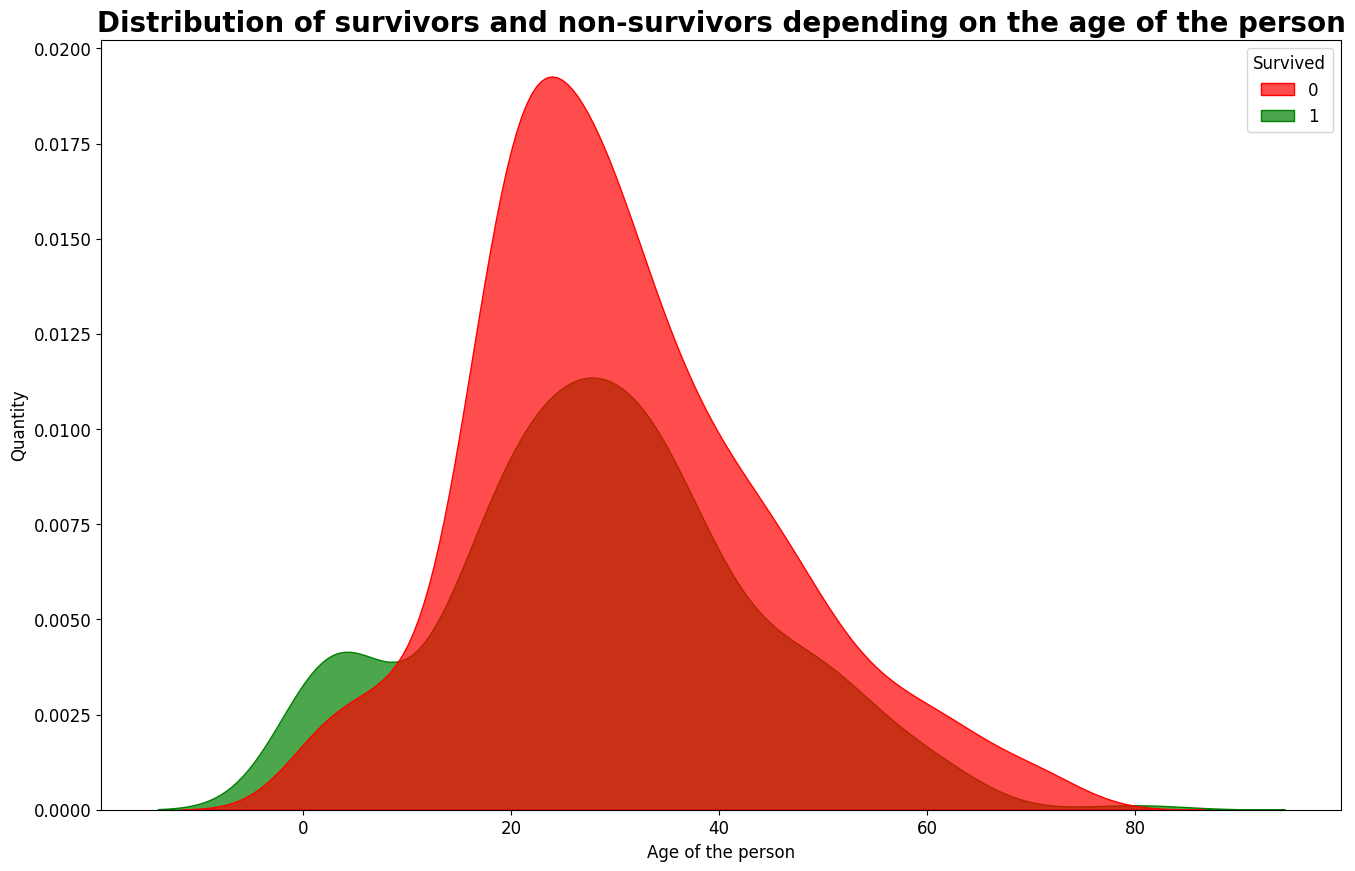

In [ ]:
sns.kdeplot(data = df,
           x = 'Age',
           hue = 'Survived',
           fill = True,
           alpha = 0.7,
           palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the age of the person',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Age of the person')
plt.show()

Більшість дітей вижили

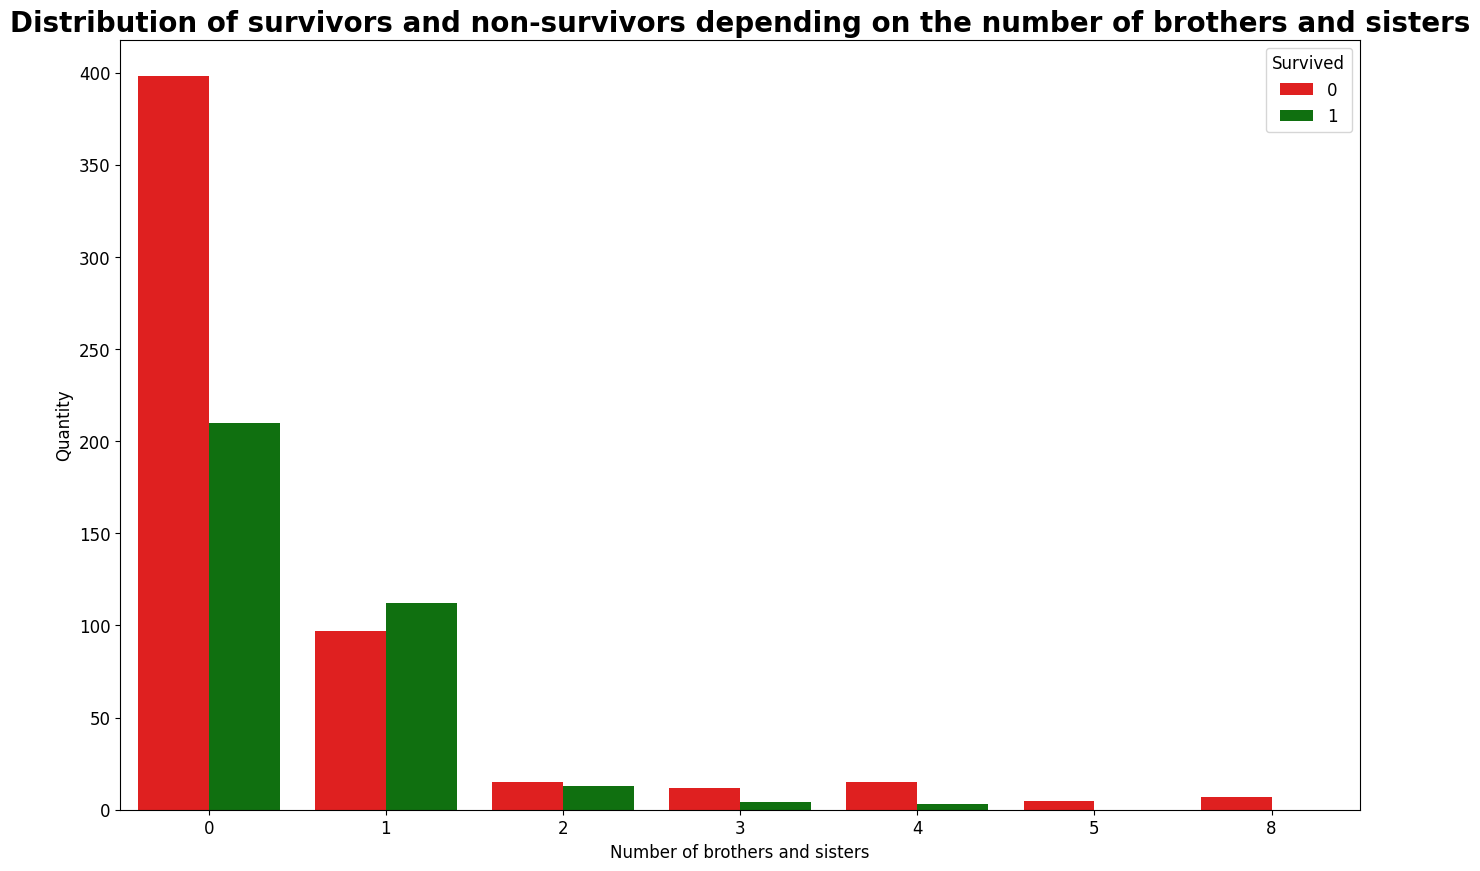

In [ ]:
sns.countplot(data = df,
             x = 'SibSp',
             hue = 'Survived',
             palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the number of brothers and sisters',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Number of brothers and sisters')
plt.show()


    Серед тих, чтьо мав 0, 2, 3, 4 братів і сестер, більшість не вижили
    Серед тих, что мав 1 брата чи сестру, більшість вижили
    Серед тих, что мав 5 чи 8 братів та сестер, ніхто не вижив


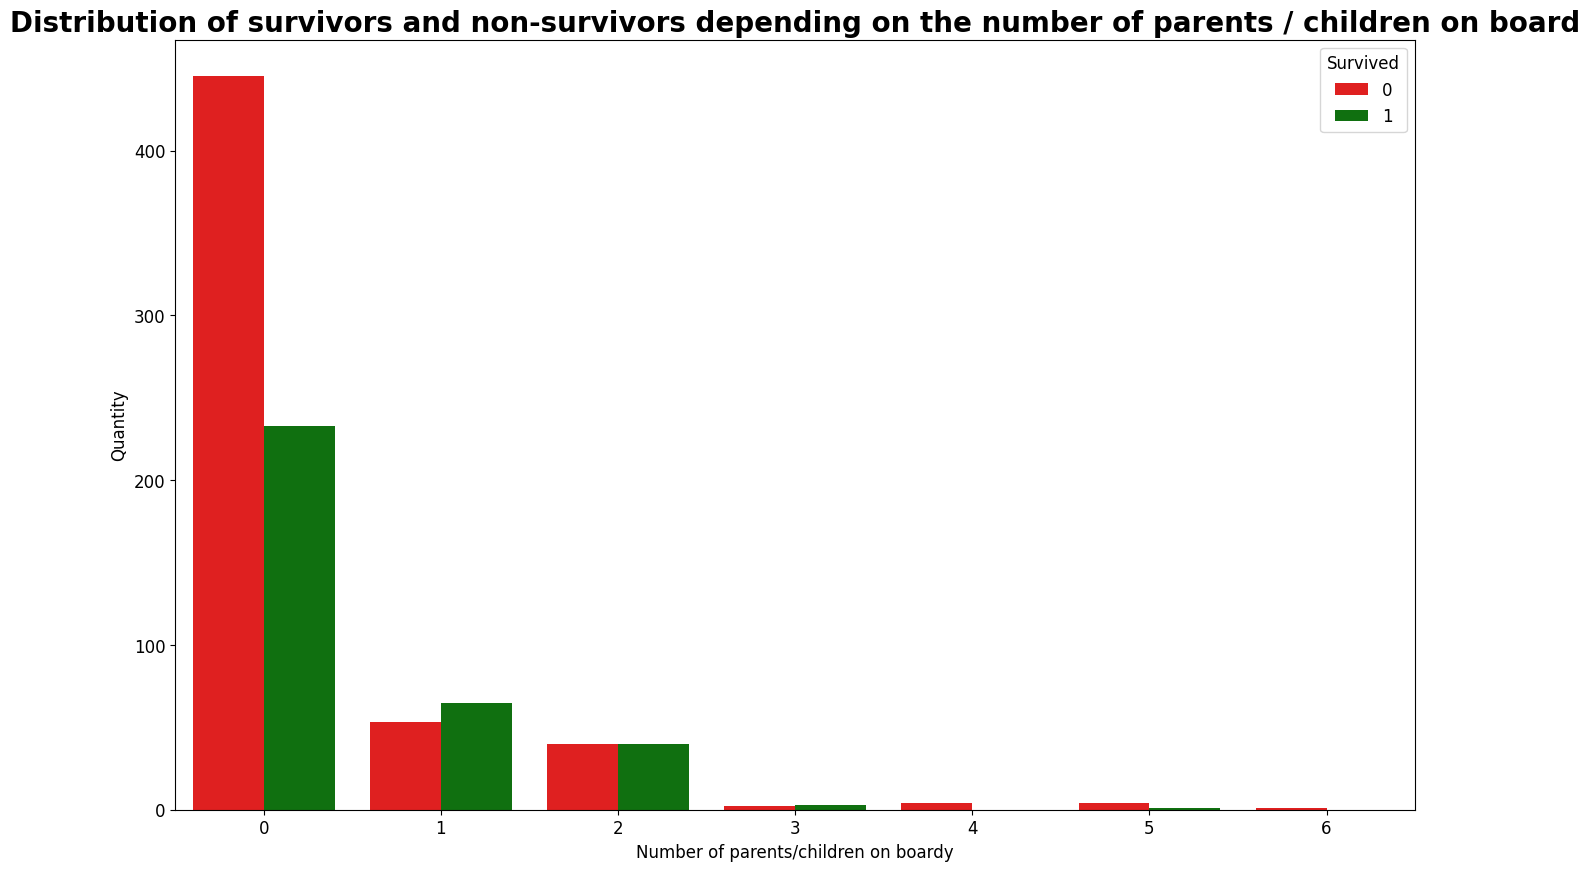

In [ ]:
sns.countplot(data = df,
             x = 'Parch',
             hue = 'Survived',
             palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the number of parents / children on board',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Number of parents/children on boardу')
plt.show()


    Серед тих, хто мав 0, 4, 5, 6 батьків чи дітей на борту, більшість загинула
    Серед тих, что мав 1 або 3 дітей на борту, більшість вижила
    У тих хто мав 2 батьків чи дітей, шанси вижити будли 50/50


In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Number_Ticket,Fare,Count_Cabins
count,891.000000,891.000000,714.000000,891.000000,891.000000,8.910000e+02,891.000000,204.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,2.552204e+05,32.204208,1.166667
std,0.486592,0.836071,14.526497,1.102743,0.806057,5.694927e+05,49.693429,0.507740
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000e+00,0.000000,1.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,1.351850e+04,7.910400,1.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,1.108130e+05,14.454200,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,3.470735e+05,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,3.101317e+06,512.329200,4.000000


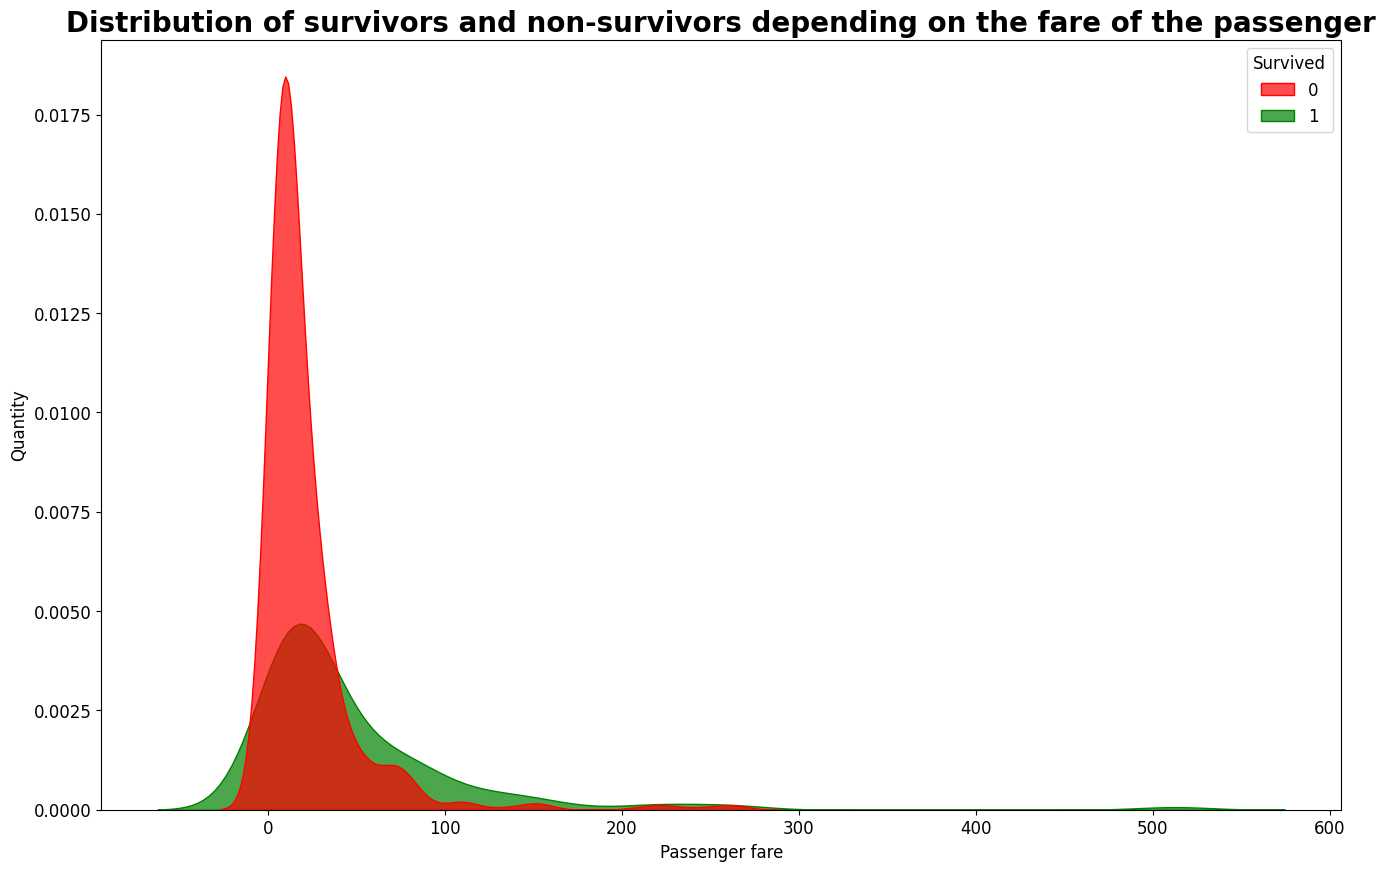

In [ ]:
sns.kdeplot(data = df,
           x = 'Fare',
           hue = 'Survived',
           fill = True,
           alpha = 0.7,
           palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the fare of the passenger',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Passenger fare')
# plt.xticks(range(0,600,20))
plt.show()


    Серед тих, у кого ціна білета була від 0 до 40, більшість загинули
    Серед тих, хто мав дорожчі квитки, більшість вижила


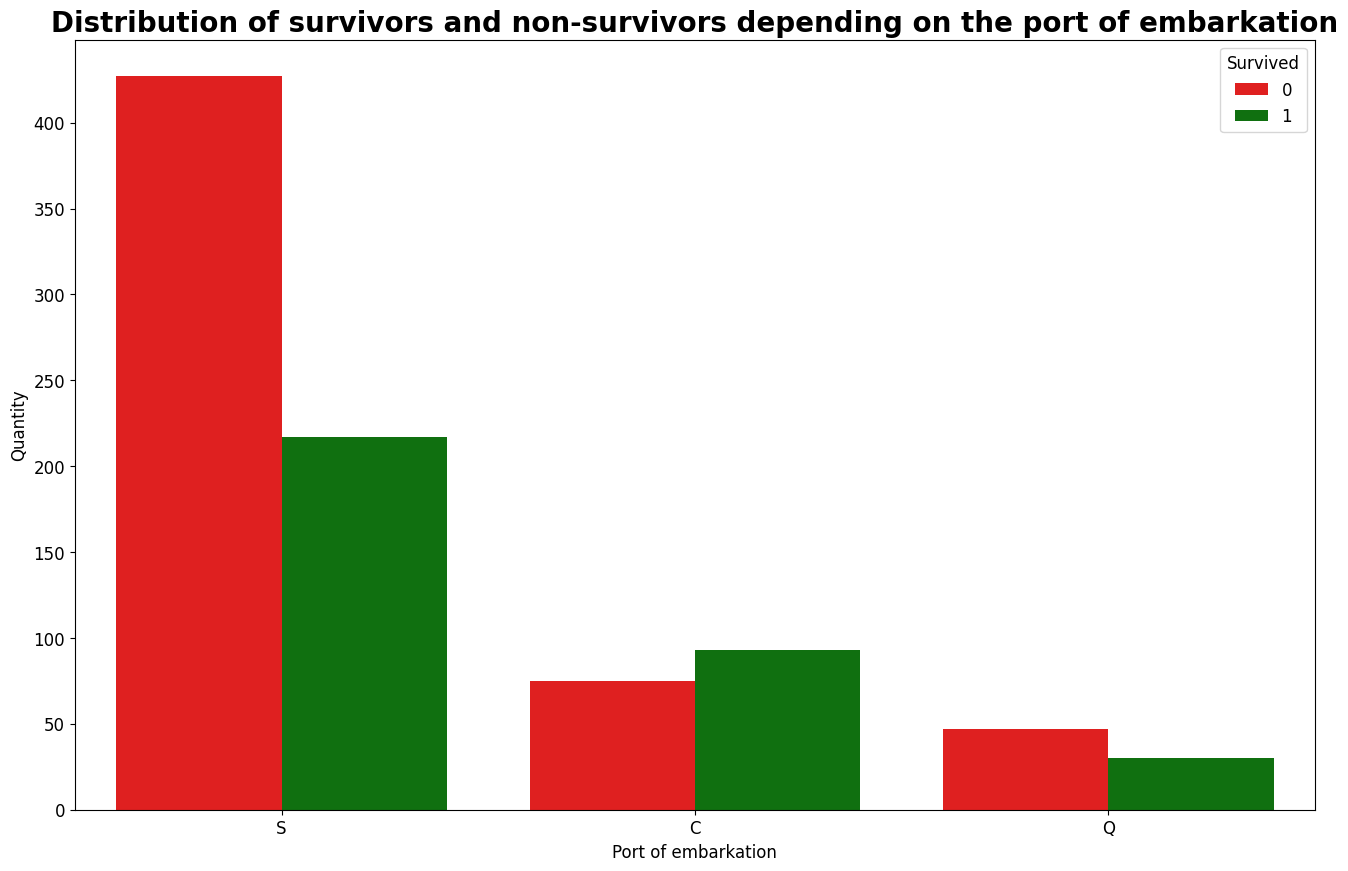

In [ ]:
sns.countplot(data = df,
             x = 'Embarked',
             hue = 'Survived',
             palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the port of embarkation',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Port of embarkation')
plt.show()


    C = Cherbourg,
    Q = Queenstown,
    S = Southampton

    Серед тих, хто сів в порту Southampton чи Queenstown більшість загинули
    Серед тих, хто сів у Cherbourg - більшість вижили


In [ ]:
df.head()

,Survived,Pclass,Status,Sex,Age,SibSp,Parch,Number_Ticket,Fare,Cabin Type,Embarked,Count_Cabins
0,0,3,Mr,male,22.0,1,0,21171,7.2500,NaN,S,NaN
1,1,1,Mrs,female,38.0,1,0,17599,71.2833,C,C,1.0
2,1,3,Miss,female,26.0,0,0,3101282,7.9250,NaN,S,NaN
3,1,1,Mrs,female,35.0,1,0,113803,53.1000,C,S,1.0
4,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,NaN


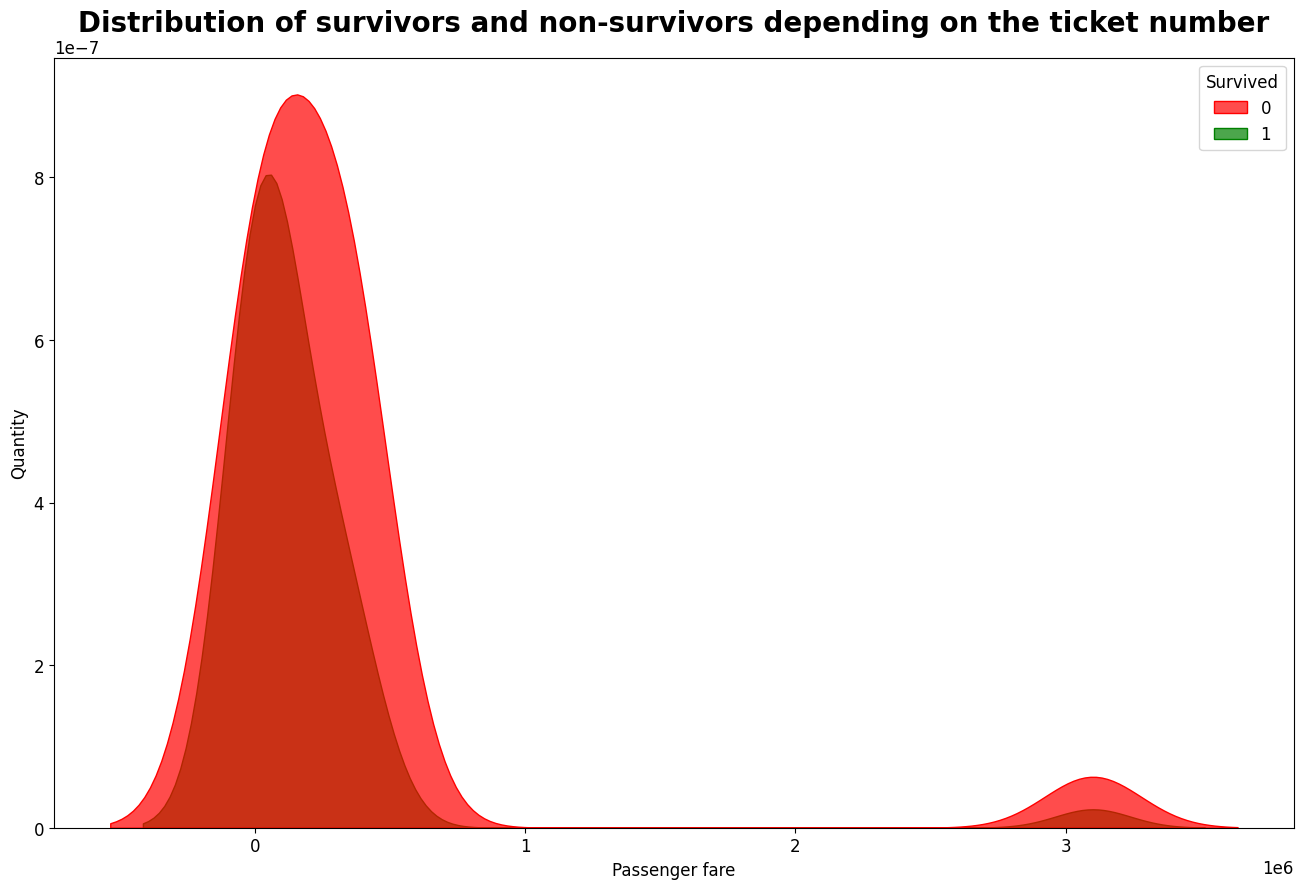

In [ ]:
sns.kdeplot(data = df,
           x = 'Number_Ticket',
           hue = 'Survived',
           fill = True,
           alpha = 0.7,
           palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the ticket number',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Passenger fare')
plt.show()

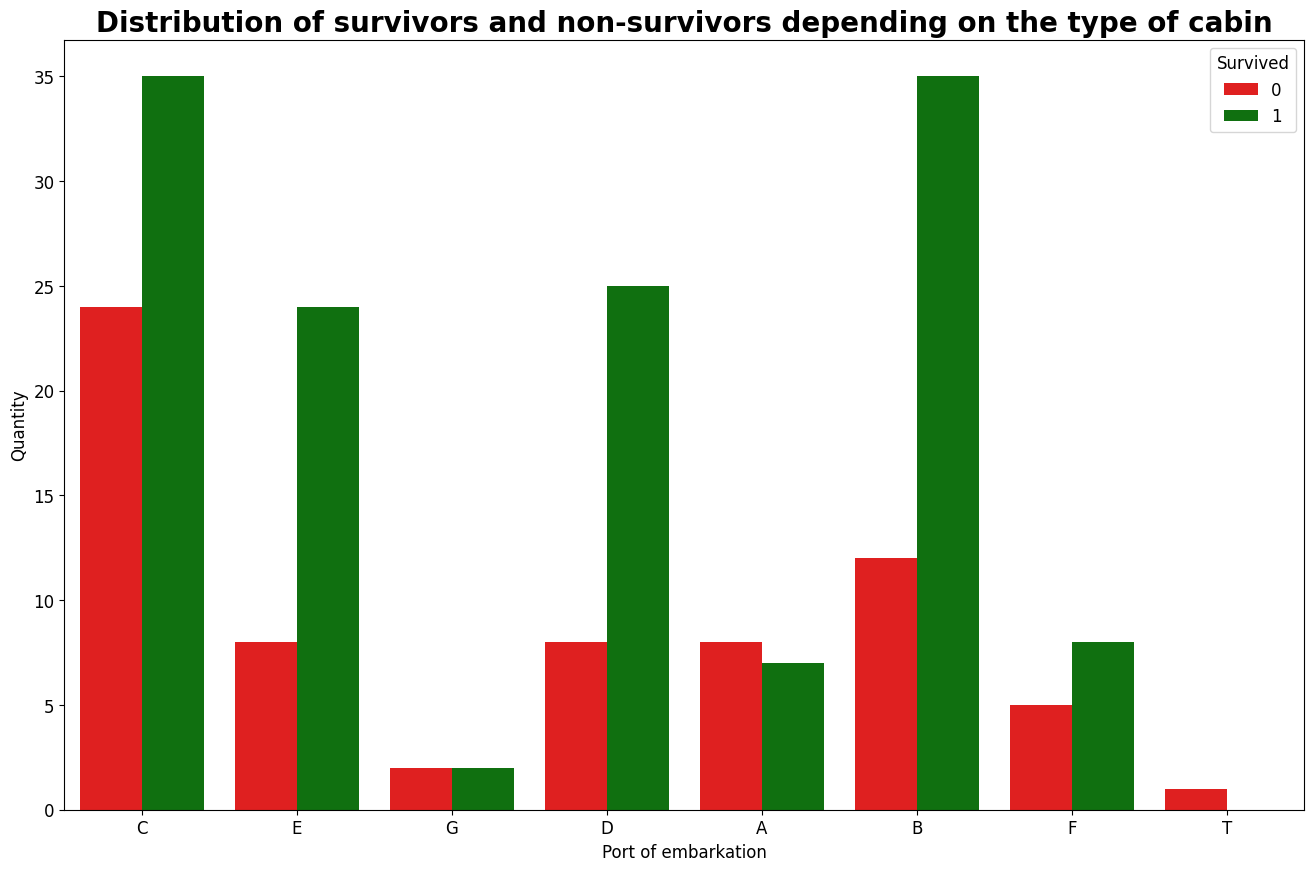

In [ ]:
sns.countplot(data = df[df['Cabin Type'].notna()],
             x = 'Cabin Type',
             hue = 'Survived',
             palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the type of cabin',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Port of embarkation')
plt.show()

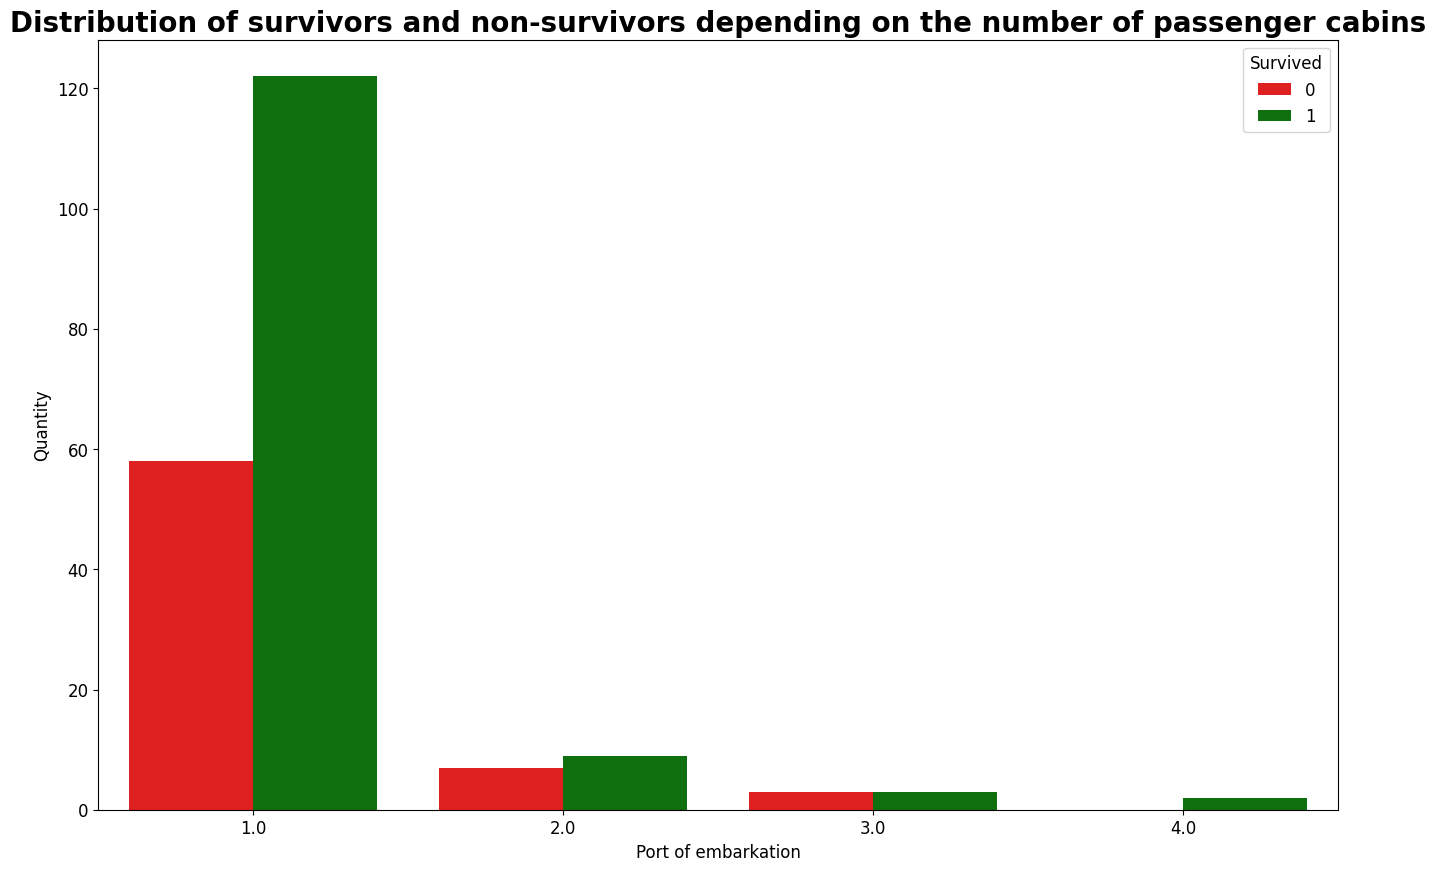

In [ ]:
sns.countplot(data = df[df['Count_Cabins'].notna()],
             x = 'Count_Cabins',
             hue = 'Survived',
             palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the number of passenger cabins',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Port of embarkation')
plt.show()

# Заповнення пропусків

In [ ]:

data = {
        'Not NaN' : df.notna().sum(),
        'NaN' : df.isna().sum(),
        '% NaN' : round((df.isna().sum() / df.shape[0])*100,2)
       }

data = pd.DataFrame(data)
data

,Not NaN,NaN,% NaN
Survived,891,0,0.00
Pclass,891,0,0.00
Status,891,0,0.00
Sex,891,0,0.00
Age,714,177,19.87
SibSp,891,0,0.00
Parch,891,0,0.00
Number_Ticket,891,0,0.00
Fare,891,0,0.00
Cabin Type,204,687,77.10


In [ ]:
lst = df['Status'].value_counts().index
mean_age = []

for l in lst:
    mean_age.append(df[(df['Status'] == l) & (df['Age'].notna())]['Age'].mean())

<Axes: xlabel='Status', ylabel='Age'>

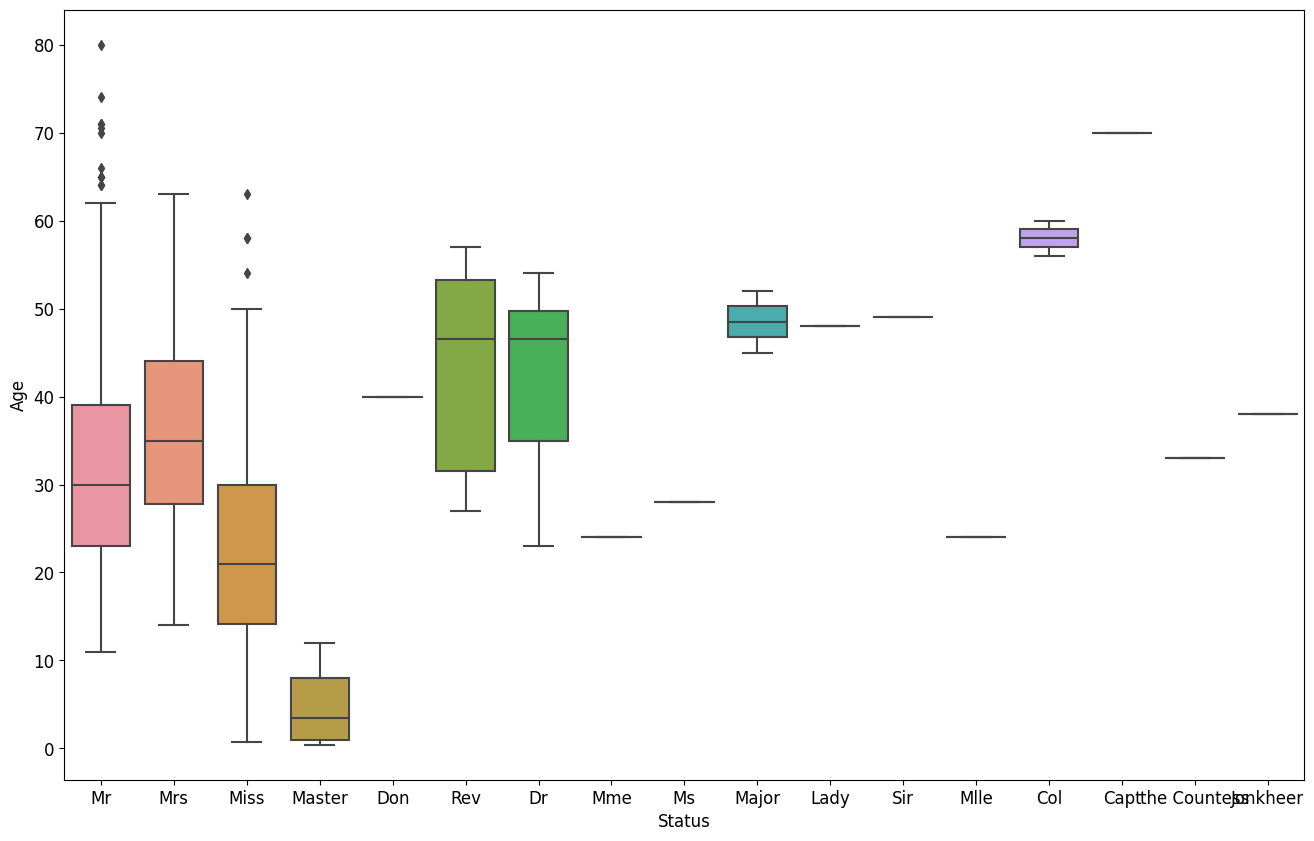

In [ ]:
sns.boxplot(df, x="Status", y="Age")

In [ ]:

data = {
        'mean_age' : mean_age
       }

data = pd.DataFrame(data)
data = data.set_index(df['Status'].value_counts().index)
data['mean_age'] = data['mean_age'].astype('int')
data

,mean_age
Mr,32
Miss,21
Mrs,35
Master,4
Dr,42
Rev,43
Mlle,24
Major,48
Col,58
the Countess,33


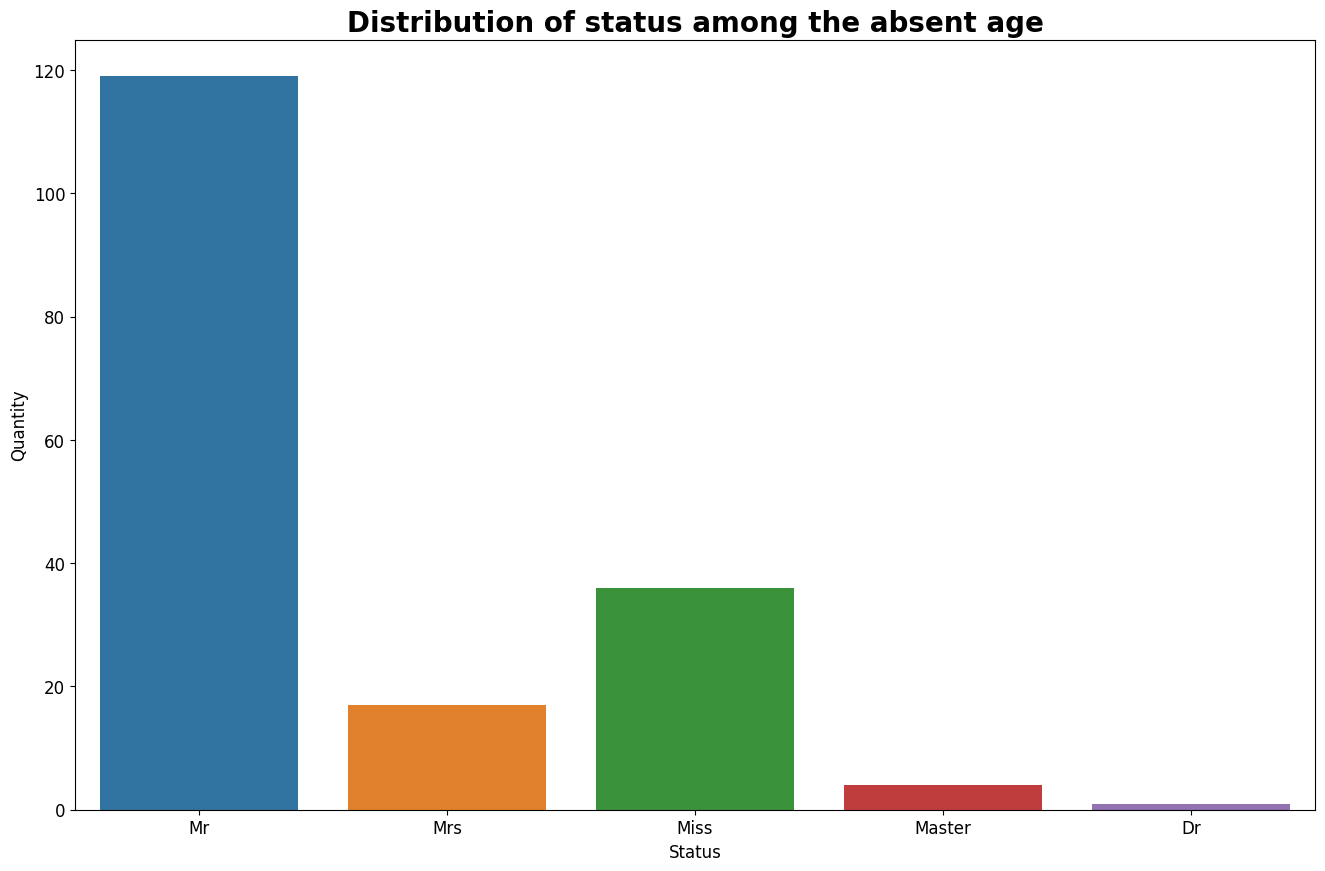

In [ ]:
sns.countplot(data = df[df['Age'].isna()],
             x = 'Status')
plt.title('Distribution of status among the absent age', fontweight = 'bold')
plt.xlabel('Status')
plt.ylabel('Quantity')
plt.show()

In [ ]:
df['Status'].nunique()

17


    Вік пропущений лише в наступних статусах:
    Mr
    Mrs
    Miss
    Master
    Dr

    Відповідно заповнюватимемо лише ці групи

In [ ]:
lst = df[df['Age'].isna()]['Status'].value_counts().index

for l in lst:
    df.loc[(df['Age'].isna())&(df['Status'] == l),'Age'] = df.loc[(df['Age'].isna())& (df['Status'] == l),'Age'].fillna(data.loc[l][0])

In [ ]:
df.isna().sum()

Survived           0
Pclass             0
Status             0
Sex                0
Age                0
SibSp              0
Parch              0
Number_Ticket      0
Fare               0
Cabin Type       687
Embarked           2
Count_Cabins     687
dtype: int64


Як бачимо пропуски віку відсутні.
Заповнимо 2 наявні пропуски в колонці Embedded


In [ ]:
df[df['Embarked'].isna()]

,Survived,Pclass,Status,Sex,Age,SibSp,Parch,Number_Ticket,Fare,Cabin Type,Embarked,Count_Cabins
61,1,1,Miss,female,38.0,0,0,113572,80.0,B,NaN,1.0
829,1,1,Mrs,female,62.0,0,0,113572,80.0,B,NaN,1.0


In [ ]:
Survived = df[df['Survived'] == 1]['Embarked'].mode()[0]
Pclass = df[df['Pclass'] == 1]['Embarked'].mode()[0]
Status_1 = df[df['Status'] == 'Miss']['Embarked'].mode()[0]
Status_2 = df[df['Status'] == 'Mrs']['Embarked'].mode()[0]
Sex = df[df['Sex'] == 'female']['Embarked'].mode()[0]
Age_38 = df[df['Age'] == 38]['Embarked'].mode()[0]
Age_62 = df[df['Age'] == 62]['Embarked'].mode()[0]
SibSp = df[df['SibSp'] == 0]['Embarked'].mode()[0]

lst = [Survived,Pclass,Status_1,Status_2,Sex,Age_38,Age_62,SibSp]

lst

['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S']

In [ ]:
df.loc[df['Embarked'].isna(),'Embarked'] = df.loc[df['Embarked'].isna(),'Embarked'].fillna('S')

In [ ]:
index = df['Pclass'].value_counts().sort_index().index
pclass = []

for i in index:
    pclass.append(df[df['Pclass'] == i]['Cabin Type'].mode()[0])


Cabin_Type = {
        'Mode': pclass,

       }

Cabin_Type = pd.DataFrame(Cabin_Type)
Cabin_Type = Cabin_Type.set_index(index)
Cabin_Type

,Mode
1,C
2,F
3,F



    В 1 класі - тип каюти C
    В 2 класі - тип каюти - F
    В 3 класі - тип каюти - F


In [ ]:
for i in Cabin_Type.index:
    df.loc[(df['Cabin Type'].isna())&(df['Pclass'] == i),'Cabin Type'] = df.loc[(df['Cabin Type'].isna())&(df['Pclass'] == i),'Cabin Type'].fillna(Cabin_Type.loc[i][0])

In [ ]:
index = df['Cabin Type'].value_counts().sort_index().index
count = []
for i in index:
    count.append(df[df['Cabin Type'] == i]['Count_Cabins'].median())

Count_Cabins = {
        'Mode': count,

       }

Count_Cabins = pd.DataFrame(Count_Cabins)
Count_Cabins = Count_Cabins.set_index(index)
Count_Cabins

,Mode
A,1.0
B,1.0
C,1.0
D,1.0
E,1.0
F,1.0
G,1.0
T,1.0


In [ ]:
for i in Count_Cabins.index:
    df.loc[(df['Count_Cabins'].isna())&(df['Cabin Type'] == i),'Count_Cabins'] = df.loc[(df['Count_Cabins'].isna())&(df['Cabin Type'] == i),'Count_Cabins'].fillna(Count_Cabins.loc[i][0])

In [ ]:
# кількість NaN
data = {
        'Not NaN' : df.notna().sum(),
        'NaN' : df.isna().sum(),
        '% NaN' : round((df.isna().sum() / df.shape[0])*100,2)
       }

data = pd.DataFrame(data)
data

,Not NaN,NaN,% NaN
Survived,891,0,0.0
Pclass,891,0,0.0
Status,891,0,0.0
Sex,891,0,0.0
Age,891,0,0.0
SibSp,891,0,0.0
Parch,891,0,0.0
Number_Ticket,891,0,0.0
Fare,891,0,0.0
Cabin Type,891,0,0.0


In [ ]:
df.dtypes

Survived           int64
Pclass             int64
Status            object
Sex               object
Age              float64
SibSp              int64
Parch              int64
Number_Ticket      int64
Fare             float64
Cabin Type        object
Embarked          object
Count_Cabins     float64
dtype: object

# Кодування перемінних

In [ ]:
df.describe(include="object")

,Status,Sex,Cabin Type,Embarked
count,891,891,891,891
unique,17,2,8,3
top,Mr,male,F,S
freq,517,577,660,646


In [ ]:
df.Status.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Status, dtype: int64

In [ ]:
df_c = df.copy()

In [ ]:
cat = ['Status','Sex','Embarked','Cabin Type']

for i in cat:
    unique = df[i].nunique()
    print(f'{i} = {unique} unique values')

Status = 17 unique values
Sex = 2 unique values
Embarked = 3 unique values
Cabin Type = 8 unique values


In [ ]:
encoder = LabelEncoder()

In [ ]:
for i in cat:
    df[i] = encoder.fit_transform(df[i])

In [ ]:
for i in cat:
    unique = df[i].nunique()
    print(f'{i} = {unique} unique values')

Status = 17 unique values
Sex = 2 unique values
Embarked = 3 unique values
Cabin Type = 8 unique values


In [ ]:
df.head()

,Survived,Pclass,Status,Sex,Age,SibSp,Parch,Number_Ticket,Fare,Cabin Type,Embarked,Count_Cabins
0,0,3,11,1,22.0,1,0,21171,7.2500,5,2,1.0
1,1,1,12,0,38.0,1,0,17599,71.2833,2,0,1.0
2,1,3,8,0,26.0,0,0,3101282,7.9250,5,2,1.0
3,1,1,12,0,35.0,1,0,113803,53.1000,2,2,1.0
4,0,3,11,1,35.0,0,0,373450,8.0500,5,2,1.0


In [ ]:
df.dtypes

Survived           int64
Pclass             int64
Status             int64
Sex                int64
Age              float64
SibSp              int64
Parch              int64
Number_Ticket      int64
Fare             float64
Cabin Type         int64
Embarked           int64
Count_Cabins     float64
dtype: object

In [ ]:
df.head()

,Survived,Pclass,Status,Sex,Age,SibSp,Parch,Number_Ticket,Fare,Cabin Type,Embarked,Count_Cabins
0,0,3,11,1,22.0,1,0,21171,7.2500,5,2,1.0
1,1,1,12,0,38.0,1,0,17599,71.2833,2,0,1.0
2,1,3,8,0,26.0,0,0,3101282,7.9250,5,2,1.0
3,1,1,12,0,35.0,1,0,113803,53.1000,2,2,1.0
4,0,3,11,1,35.0,0,0,373450,8.0500,5,2,1.0


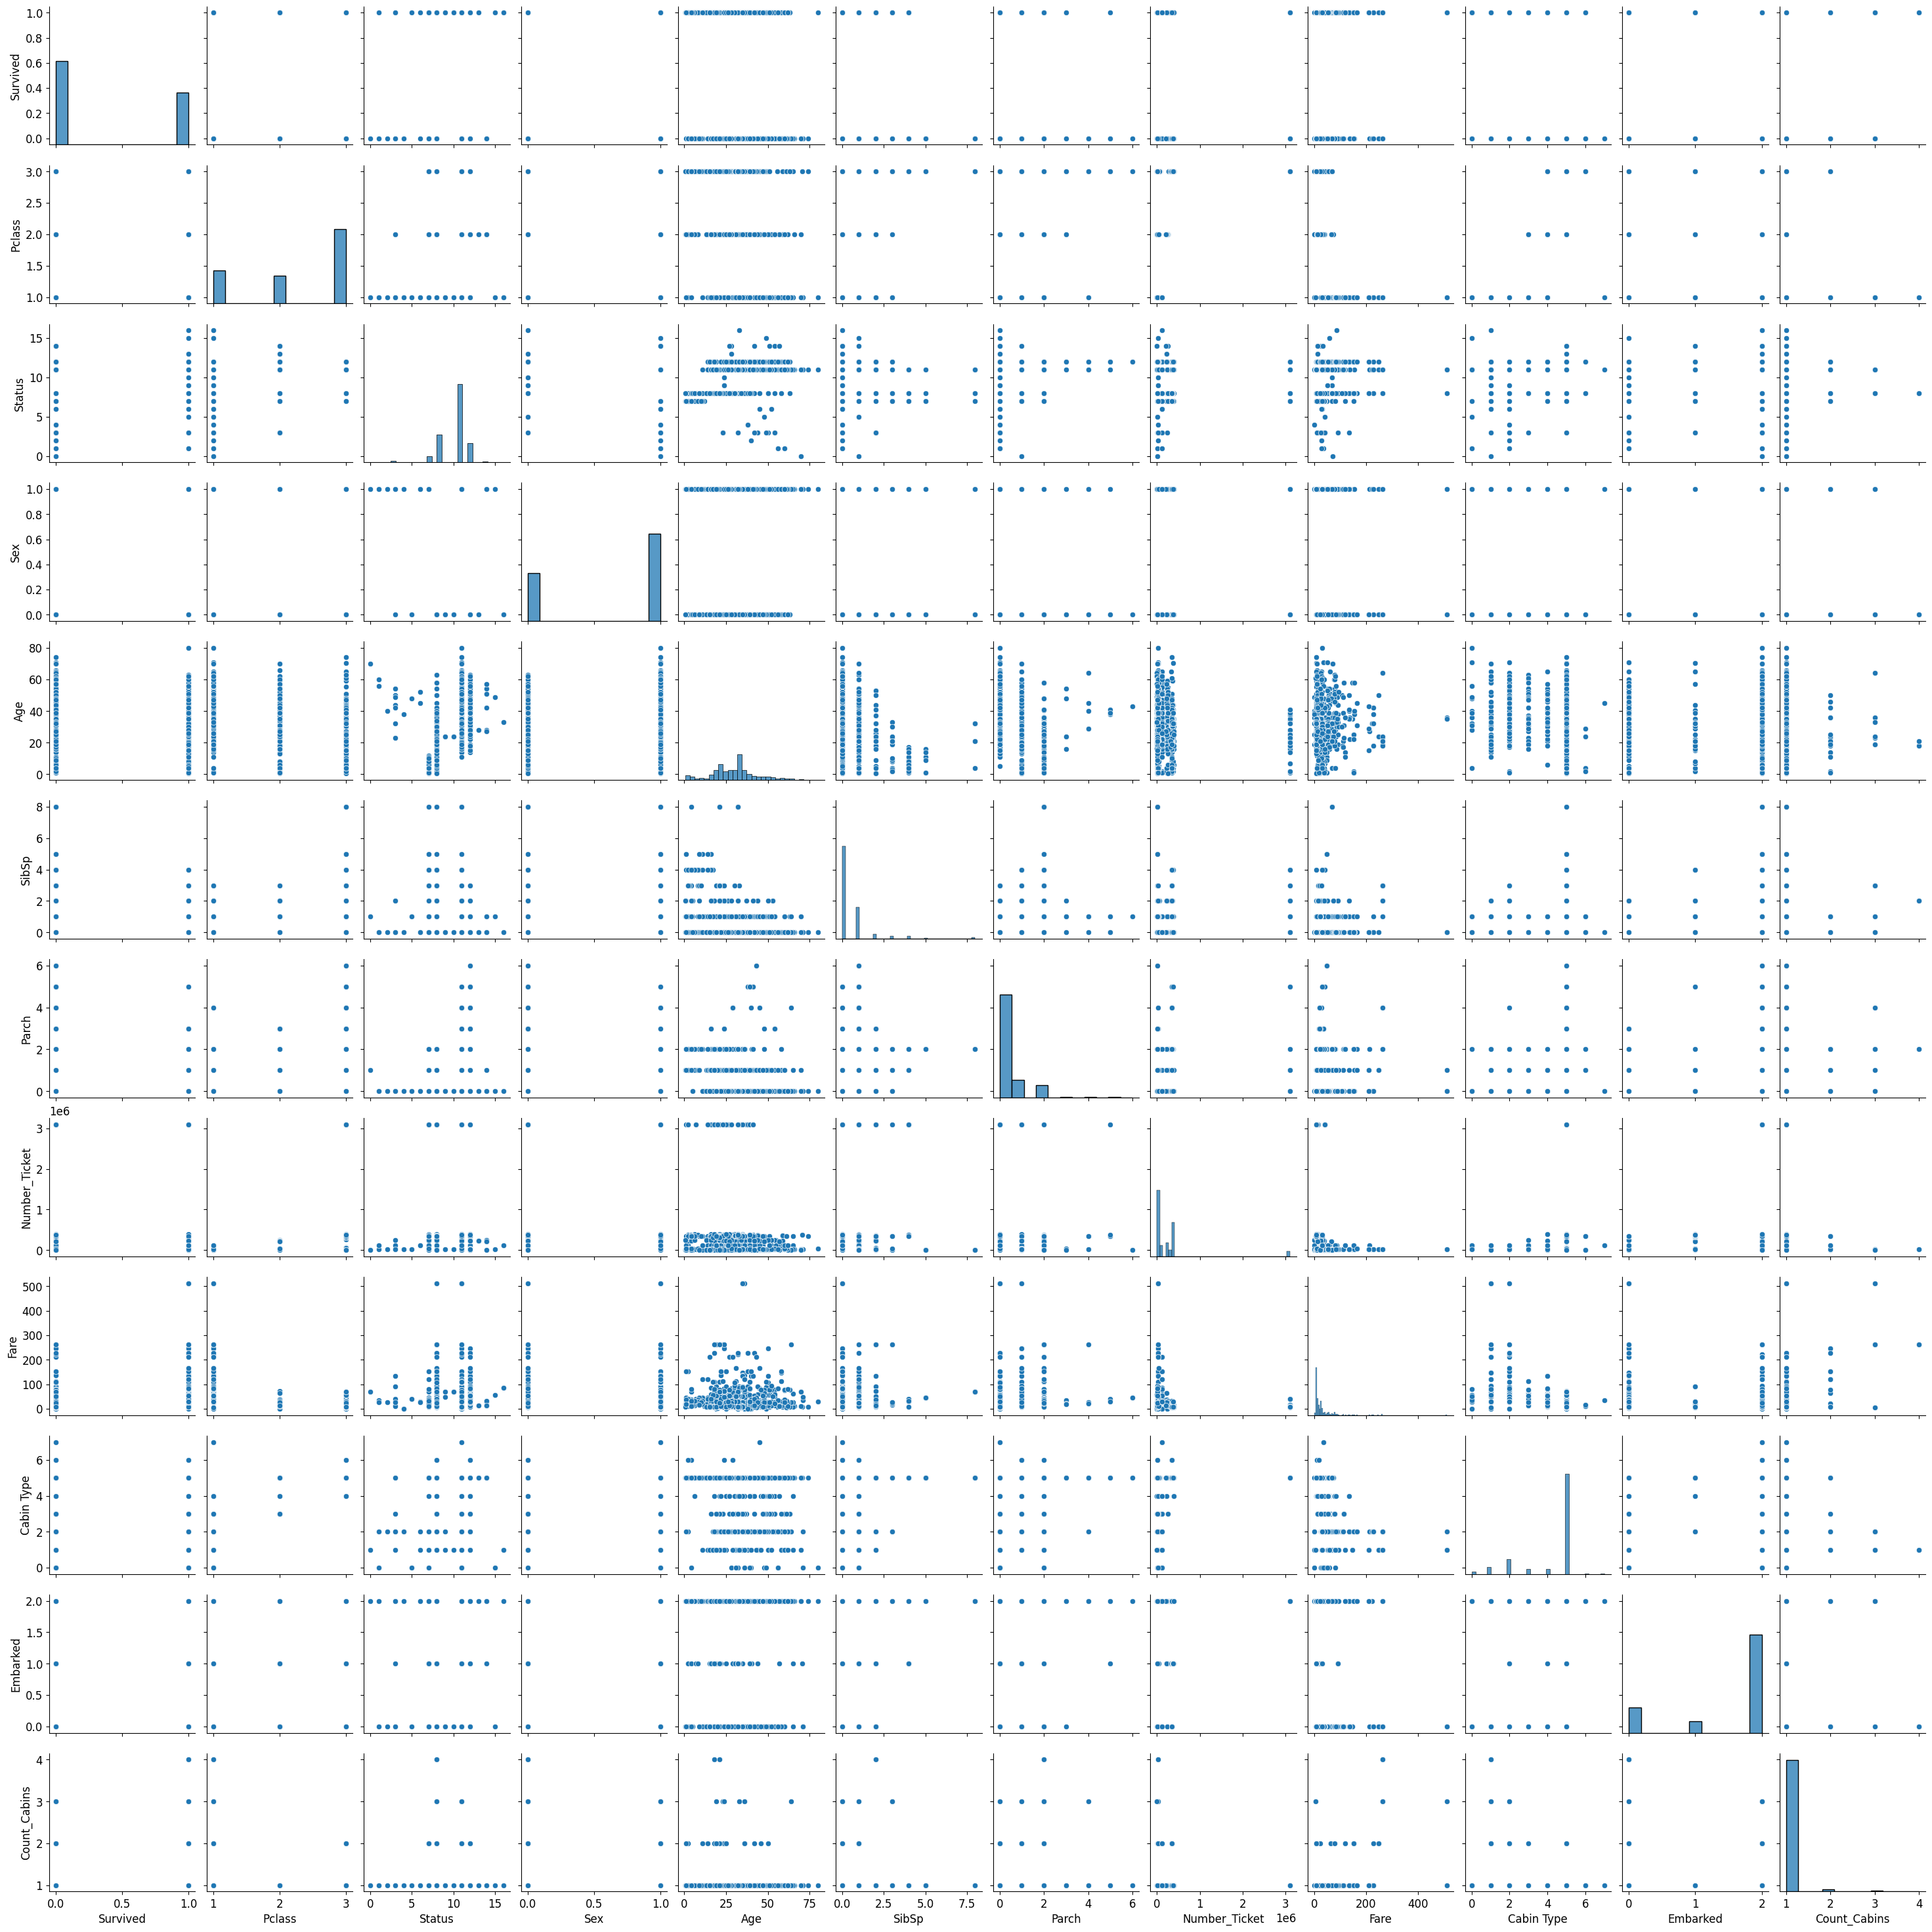

In [ ]:
sns.pairplot(df)

# Splitting the data set into explanatory and target variables

In [ ]:
df = df_c.copy()

In [ ]:
df = pd.get_dummies(df, columns=['Sex','Embarked', 'Cabin Type', 'Status'], drop_first=True)

In [ ]:
df

,Survived,Pclass,Age,SibSp,Parch,Number_Ticket,Fare,Count_Cabins,Sex_male,Embarked_Q,...,Status_Master,Status_Miss,Status_Mlle,Status_Mme,Status_Mr,Status_Mrs,Status_Ms,Status_Rev,Status_Sir,Status_the Countess
0,0,3,22.0,1,0,21171,7.2500,1.0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,38.0,1,0,17599,71.2833,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,3,26.0,0,0,3101282,7.9250,1.0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,35.0,1,0,113803,53.1000,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,3,35.0,0,0,373450,8.0500,1.0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,211536,13.0000,1.0,1,0,...,0,0,0,0,0,0,0,1,0,0
887,1,1,19.0,0,0,112053,30.0000,1.0,0,0,...,0,1,0,0,0,0,0,0,0,0
888,0,3,21.0,1,2,6607,23.4500,1.0,0,0,...,0,1,0,0,0,0,0,0,0,0
889,1,1,26.0,0,0,111369,30.0000,1.0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
X = df.drop('Survived',axis = 1)
y = df['Survived']

# Mutual information assessment


    mutual_info_classif-
    оцінка взаємної інформації між ознаками та цільовою змінною в класифікаційних завданнях.

    Взаємна інформація вимірює зв'язок між двома змінними.
    У разі класифікації це дозволяє визначити, наскільки інформативна кожна ознака щодо цільової змінної.
    Чим вище значення взаємної інформації, тим сильніший зв'язок між атрибутом і цільовою змінною.

    mutual_info_classic використовує entropy-based метод оцінки взаємної інформації.
    Розраховується для кожного параметра не беручи до уваги решти.
    Таким чино це некореляційна метрика "uncorrelated", тому вона не враховує залежності між параметрами.


In [ ]:
mi = mutual_info_classif(X, y)
mutual_info = []
for i, column in enumerate(X.columns):
    mutual_info.append(mi[i])

In [ ]:
data = {'Mutual information' : mutual_info }

data = pd.DataFrame(data)
data = data.set_index(X.columns)
data = data.sort_values(by = 'Mutual information', ascending = False)
data

,Mutual information
Status,0.164877
Sex,0.149679
Fare,0.134269
Number_Ticket,0.118382
Pclass,0.054112
Cabin Type,0.052711
SibSp,0.026122
Age,0.018459
Parch,0.017312
Embarked,0.004196


<Axes: >

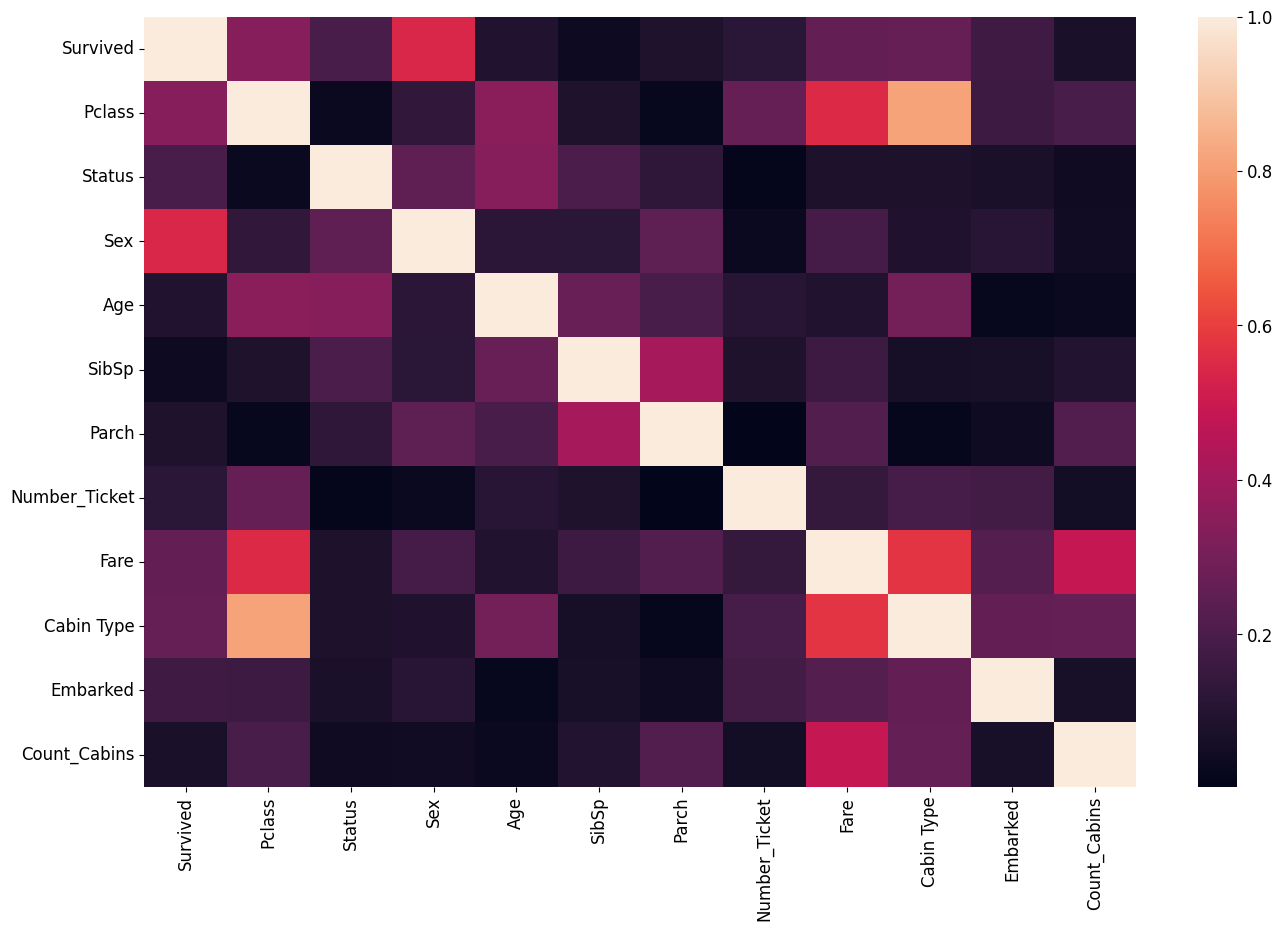

In [ ]:
sns.heatmap(abs(df.corr()))

<Axes: xlabel='Embarked', ylabel='Age'>

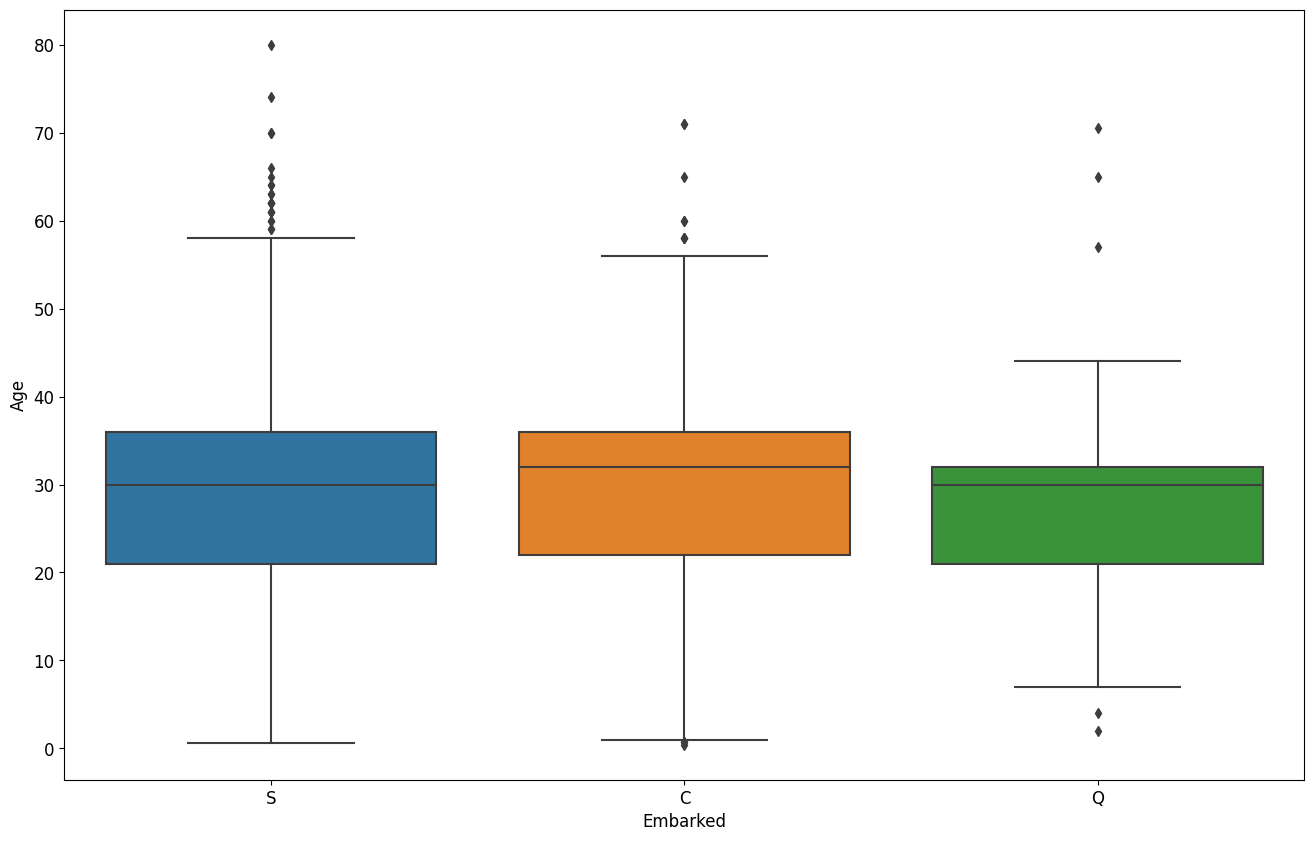

In [ ]:
sns.boxplot(df_c, x="Embarked", y='Age')

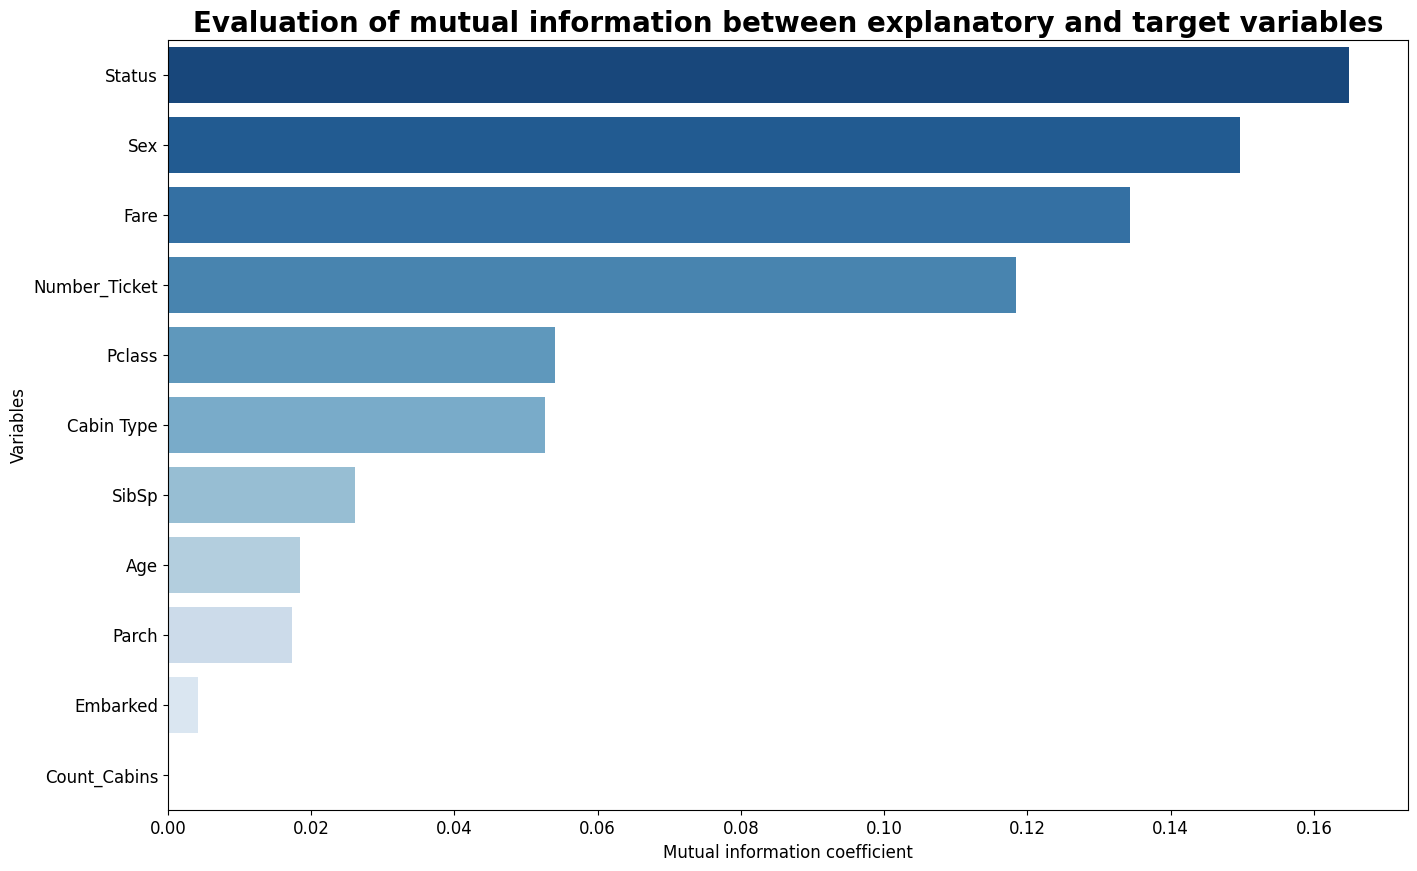

In [ ]:
sns.barplot(data = data,
           x = 'Mutual information',
           y = data.index,
           palette = 'Blues_r')
plt.title('Evaluation of mutual information between explanatory and target variables', fontweight = 'bold')
plt.ylabel('Variables')
plt.xlabel('Mutual information coefficient')
plt.show()


    Параметр Status має найвищу оцінку взаємної інформації - цей атрибут містить багато інформації про цільову змінну
    і має з ним міцний зв’язок.

# Моделювання

## Logistic Regression

In [ ]:
model_LRb = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)

In [ ]:
model_LRb.classes_

array([0, 1])

In [ ]:
pd.DataFrame({'Feature': X.columns.tolist(), 'Coef': model_LRb.coef_[0]})

,Feature,Coef
0,Pclass,-1.227043e-03
1,Age,-1.264788e-02
2,SibSp,-2.606884e-04
3,Parch,-3.993507e-06
4,Number_Ticket,-7.232634e-07
5,Fare,8.688803e-03
6,Count_Cabins,-3.152975e-04
7,Sex_male,-7.781852e-04
8,Embarked_Q,-1.384840e-05
9,Embarked_S,-3.463074e-04


In [ ]:
model_LRb.coef_

array([[-1.22704285e-03, -1.26478765e-02, -2.60688373e-04,
        -3.99350740e-06, -7.23263374e-07,  8.68880321e-03,
        -3.15297465e-04, -7.78185182e-04, -1.38483998e-05,
        -3.46307377e-04,  5.18778995e-05,  1.27766060e-05,
         4.39421889e-05,  4.43077480e-05, -4.71557465e-04,
         8.95461613e-07, -2.47018631e-06,  2.96020394e-07,
        -2.58182640e-06, -2.30096510e-06, -2.49706276e-06,
         2.65814886e-06,  3.84214596e-07,  2.74109876e-05,
         2.25099153e-04,  5.06912875e-06,  2.50337297e-06,
        -7.82232068e-04,  2.12741910e-04,  2.96096909e-06,
        -1.39188889e-05,  2.61372890e-06,  2.59208438e-06]])

In [ ]:
df.head()

,Survived,Pclass,Status,Sex,Age,SibSp,Parch,Number_Ticket,Fare,Cabin Type,Embarked,Count_Cabins
0,0,3,11,1,22.0,1,0,21171,7.2500,5,2,1.0
1,1,1,12,0,38.0,1,0,17599,71.2833,2,0,1.0
2,1,3,8,0,26.0,0,0,3101282,7.9250,5,2,1.0
3,1,1,12,0,35.0,1,0,113803,53.1000,2,2,1.0
4,0,3,11,1,35.0,0,0,373450,8.0500,5,2,1.0


In [ ]:
model_LRb.predict_proba(X)

array([[0.5591046 , 0.4408954 ],
       [0.46900998, 0.53099002],
       [0.92469662, 0.07530338],
       ...,
       [0.51794511, 0.48205489],
       [0.53796221, 0.46203779],
       [0.64831421, 0.35168579]])

In [ ]:
model_LRb.score(X, y)

0.6891133557800224

In [ ]:
cm = confusion_matrix(y, model_LRb.predict(X))/len(y)
cm

array([[0.55780022, 0.05836139],
       [0.25252525, 0.13131313]])

<Axes: >

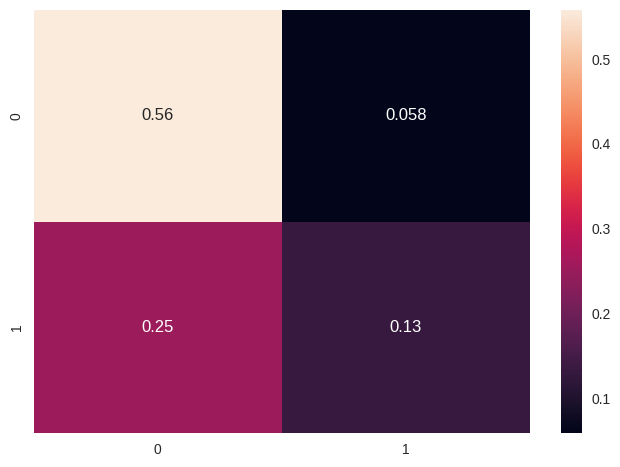

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
sc = StandardScaler()
X_ft = sc.fit_transform(X, y)

In [ ]:
model_LR = make_pipeline(
    # OneHotEncoder(handle_unknown="ignore"),
    # StandardScaler(),
    LogisticRegression(solver='liblinear', # newton-cg', 'lbfgs', 'sag', and 'saga'
                       random_state=0,
                       max_iter=500
                       )
)

In [ ]:
cv_results = cross_validate(model_LR, X_ft, y)
cv_results

{'fit_time': array([0.02337313, 0.0157001 , 0.00993896, 0.01094341, 0.00914574]),
 'score_time': array([0.00880265, 0.00182104, 0.00177789, 0.00180721, 0.00178409]),
 'test_score': array([0.80446927, 0.82022472, 0.80337079, 0.80898876, 0.85393258])}

In [ ]:
score_LR = cv_results["test_score"]
print(f"The accuracy is: {score_LR.mean():.3f} ± {score_LR.std():.3f}")

The accuracy is: 0.818 ± 0.019


## Support Vector Classification

In [ ]:
model_SVC = svm.SVC(max_iter=1000)
model_SVC.fit(X, y.values.ravel())

SVC(max_iter=1000)

In [ ]:
score_SVC = model_SVC.score(X,y)
print(f'Estimation of determination accuracy: {score_SVC * 100:.2f}%')

Estimation of determination accuracy: 61.62%


## Decision tree

In [ ]:
model_DT = tree.DecisionTreeClassifier()

In [ ]:
model_DT.fit(X,y)

DecisionTreeClassifier()

In [ ]:
score_DT = model_DT.score(X,y)
print(f'Estimation of determination accuracy: {score_DT*100:.2f}%')

Estimation of determination accuracy: 99.78%


In [ ]:
df.shape

(891, 34)

## Decision trees (hyperparametres)

In [ ]:
model_DTh = tree.DecisionTreeClassifier()
parameters = {
    'criterion':['entropy', 'gini'],
    'max_depth': range(3,7),
    'min_samples_split': range(10,20),
    'min_samples_leaf': range(5,10)
}
grid_CV = GridSearchCV(model_DTh, parameters, cv = 5)

In [ ]:
%%time
grid_CV.fit(X,y)

CPU times: user 15.8 s, sys: 34.7 ms, total: 15.8 s
Wall time: 16 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(3, 7),
                         'min_samples_leaf': range(5, 10),
                         'min_samples_split': range(10, 20)})

In [ ]:
model_DTh = grid_CV.best_estimator_

In [ ]:
print(f'Best classifier parameters:', grid_CV.best_params_)

Best classifier parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 9, 'min_samples_split': 13}


In [ ]:
score_DTh = model_DTh.score(X, y)
print(f'Estimation of determination accuracy: {score_DTh * 100:.2f}%')

Estimation of determination accuracy: 85.75%


In [ ]:
def visualize_DT_method(clf, X, name):
  export_graphviz(clf,feature_names = X.columns, out_file = name + '.dot', filled = True)
  # use the exclamation mark to call the terminal
  !dot -Tpng {name}.dot -o {name}.png
  display(Image(filename=name + '.png'))

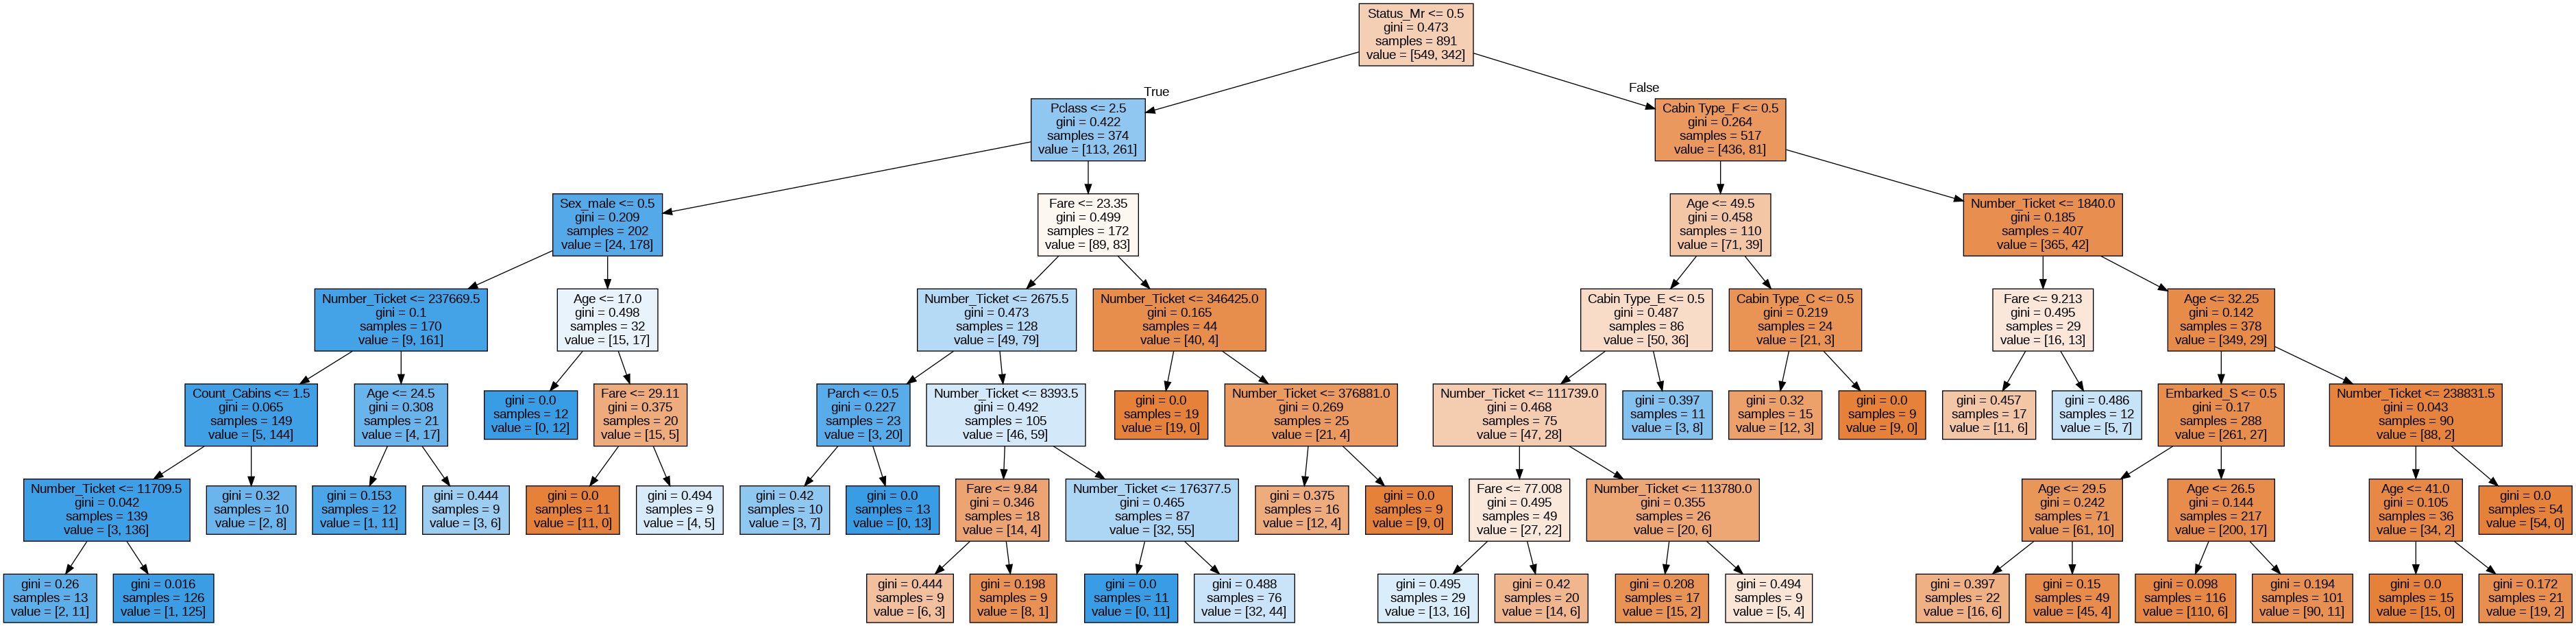

In [ ]:
visualize_DT_method(model_DTh, X, 'tree');

In [ ]:
feature_importance_DTh = pd.DataFrame({"feature": X.columns.to_list(), 'importance': model_DTh.feature_importances_}).sort_values("importance", ascending=False)
feature_importance_DTh

,feature,importance
27,Status_Mr,0.517964
0,Pclass,0.120300
4,Number_Ticket,0.102345
5,Fare,0.097323
1,Age,0.059644
14,Cabin Type_F,0.044584
7,Sex_male,0.037945
13,Cabin Type_E,0.009793
3,Parch,0.004145
6,Count_Cabins,0.002420


<Axes: xlabel='importance', ylabel='feature'>

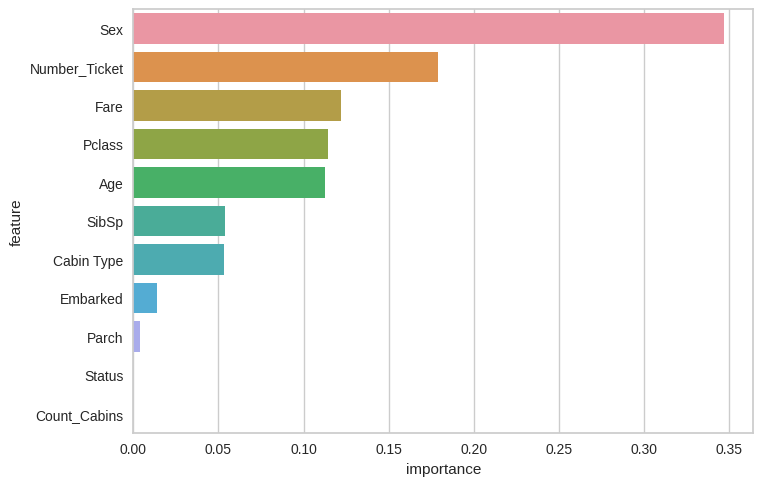

In [ ]:
sns.barplot(data = feature_importance_DTh, x = "importance", y = "feature")

## LightGBM

In [ ]:
model_LGBM = LGBMClassifier(max_depth=6, learning_rate=0.1,  num_leaves=10)

In [ ]:
model_LGBM.fit(X, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 500
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(max_depth=6, num_leaves=10)

In [ ]:
score_LGBM = model_LGBM.score(X, y)
print(f'Estimation of determination accuracy: {score_LGBM * 100:.2f}%')

Estimation of determination accuracy: 80.25%


## XGBClassifier

In [ ]:
model_XGB = XGB.XGBClassifier(max_depth=4, learning_rate=0.01)

In [ ]:
model_XGB.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
score_XGB = model_XGB.score(X, y)
print(f'Estimation of determination accuracy: {score_XGB*100:.2f}%')

Estimation of determination accuracy: 85.07%


## CatBoost

In [ ]:
model_CB = CatBoostClassifier(depth = 5, iterations = 50,
                                         l2_leaf_reg = 5, learning_rate = 0.5)

In [ ]:
model_CB.fit(X, y)

0:	learn: 0.5017744	total: 2.28ms	remaining: 112ms
1:	learn: 0.4479539	total: 4.11ms	remaining: 98.7ms
2:	learn: 0.4210075	total: 10.6ms	remaining: 167ms
3:	learn: 0.4075408	total: 15.8ms	remaining: 182ms
4:	learn: 0.3971235	total: 21.8ms	remaining: 196ms
5:	learn: 0.3792311	total: 25.3ms	remaining: 186ms
6:	learn: 0.3681444	total: 29.1ms	remaining: 179ms
7:	learn: 0.3599108	total: 35.3ms	remaining: 185ms
8:	learn: 0.3525859	total: 38.6ms	remaining: 176ms
9:	learn: 0.3515102	total: 43.8ms	remaining: 175ms
10:	learn: 0.3436871	total: 48.6ms	remaining: 172ms
11:	learn: 0.3414763	total: 52.9ms	remaining: 167ms
12:	learn: 0.3320220	total: 58.4ms	remaining: 166ms
13:	learn: 0.3280721	total: 66.6ms	remaining: 171ms
14:	learn: 0.3206092	total: 68.5ms	remaining: 160ms
15:	learn: 0.3190451	total: 71.8ms	remaining: 153ms
16:	learn: 0.3135465	total: 76.2ms	remaining: 148ms
17:	learn: 0.3058261	total: 79.6ms	remaining: 141ms
18:	learn: 0.3042325	total: 81.4ms	remaining: 133ms
19:	learn: 0.2956767	

In [ ]:
score_CB = model_CB.score(X, y)
print(f'Estimation of determination accuracy: {score_CB * 100:.2f}%')

Estimation of determination accuracy: 94.05%


In [ ]:
print(f'Precision of the Logistic Regression method: {score_LR.mean() * 100:.2f}%')
print(f'Precision of the Support Vector Classification method: {score_SVC * 100:.2f}%')
print(f'Precision of the Decision Trees method with parameters: {score_DT * 100:.2f}%')
print(f'Precision of the Decision Trees method: {score_DTh * 100:.2f}%')
print(f'Precision of the LightGBM method: {score_LGBM * 100:.2f}%')
print(f'Precision of the XGBClassifier method: {score_XGB * 100:.2f}%')
print(f'Precision of the CatBoost method: {score_CB * 100:.2f}%')

Precision of the Logistic Regression method: 81.82%
Precision of the Support Vector Classification method: 61.62%
Precision of the Decision Trees method with parameters: 99.78%
Precision of the Decision Trees method: 85.75%
Precision of the LightGBM method: 80.25%
Precision of the XGBClassifier method: 85.07%
Precision of the CatBoost method: 94.05%


# Оцінка моделей

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
model_LRb_a = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)

In [ ]:
model_LRb.score(X, y)

0.6891133557800224

In [ ]:
model_LRb_a.score(X_train, y_train)

0.6976047904191617

In [ ]:
model_LRb.score(X_test, y_test)

0.6233183856502242

In [ ]:
model_LRb_a.score(X_test, y_test)

0.6278026905829597

In [ ]:
cm_train = confusion_matrix(y_train, model_LRb_a.predict(X_train))/len(y_train)
cm_train

array([[0.57634731, 0.04041916],
       [0.26197605, 0.12125749]])

In [ ]:
cm_test = confusion_matrix(y_test, model_LRb_a.predict(X_test))/len(y_test)
cm_test

array([[0.5426009 , 0.07174888],
       [0.30044843, 0.08520179]])

<Axes: >

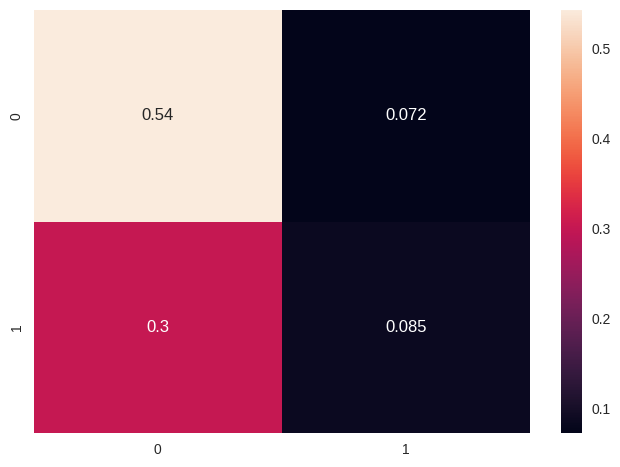

In [ ]:
sns.heatmap(cm_test, annot=True)

In [ ]:
y_pred = model_LRb_a.predict(X_test)

In [ ]:
f1_score(y_test, y_pred, average='weighted')

0.578567588139541

In [ ]:
precision_score(y_test, y_pred)

0.5428571428571428

In [ ]:
roc_auc_score(y_test, y_pred)

0.5520709556951282

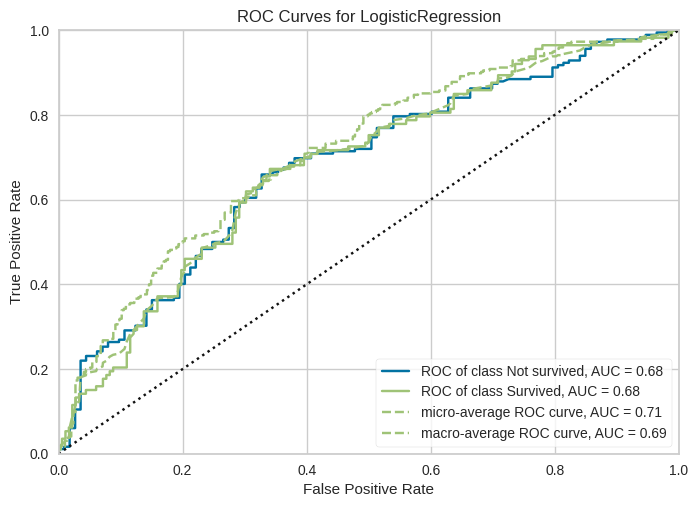

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(model_LRb_a, classes=["Not survived", "Survived"])

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [ ]:
model_LR_a2 = make_pipeline(
    # OneHotEncoder(handle_unknown="ignore"),
    LogisticRegression(solver='liblinear', # newton-cg', 'lbfgs', 'sag', and 'saga'
                       random_state=0,
                       max_iter=500
                       )
)

In [ ]:
cv_results = cross_validate(model_LR_a2, X_train, y_train)
cv_results

{'fit_time': array([0.01441431, 0.02301049, 0.03607774, 0.01494527, 0.0400703 ]),
 'score_time': array([0.01061678, 0.00397873, 0.00978374, 0.01531458, 0.01217675]),
 'test_score': array([0.7238806 , 0.67910448, 0.73134328, 0.72932331, 0.69924812])}

In [ ]:
score_LR_a2 = cv_results["test_score"]
print(f"The accuracy is: {score_LR_a2.mean():.3f} ± {score_LR_a2.std():.3f}")

The accuracy is: 0.837 ± 0.041


In [ ]:
cv_results_test = cross_validate(model_LR_a2, X_test, y_test)
cv_results_test

{'fit_time': array([0.04220724, 0.03406668, 0.02789354, 0.02898407, 0.03128862]),
 'score_time': array([0.01575303, 0.01490951, 0.01521659, 0.02135634, 0.01628256]),
 'test_score': array([0.77966102, 0.84745763, 0.83050847, 0.76271186, 0.76271186])}

In [ ]:
score_LR_a2_test = cv_results_test["test_score"]
print(f"The accuracy is: {score_LR_a2_test.mean():.3f} ± {score_LR_a2_test.std():.3f}")

The accuracy is: 0.797 ± 0.036


## PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=10)
pca

PCA(n_components=10)

In [ ]:
pca.fit(X)
PCA(n_components=2)
print(pca.explained_variance_ratio_)

[9.99999992e-01 7.46329179e-09 5.35000489e-10 3.84389354e-12
 1.79822051e-12 1.54898913e-12 1.18973403e-12 6.36633096e-13
 4.41593597e-13 2.49147861e-13]


In [ ]:
pca.explained_variance_

array([3.24321917e+11, 2.42050912e+03, 1.73512386e+02, 1.24665893e+00,
       5.83202329e-01, 5.02371128e-01, 3.85856824e-01, 2.06474068e-01,
       1.43218483e-01, 8.08041125e-02])

In [ ]:
pca.feature_names_in_

array(['Pclass', 'Age', 'SibSp', 'Parch', 'Number_Ticket', 'Fare',
       'Count_Cabins', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'Cabin Type_B', 'Cabin Type_C', 'Cabin Type_D', 'Cabin Type_E',
       'Cabin Type_F', 'Cabin Type_G', 'Cabin Type_T', 'Status_Col',
       'Status_Don', 'Status_Dr', 'Status_Jonkheer', 'Status_Lady',
       'Status_Major', 'Status_Master', 'Status_Miss', 'Status_Mlle',
       'Status_Mme', 'Status_Mr', 'Status_Mrs', 'Status_Ms', 'Status_Rev',
       'Status_Sir', 'Status_the Countess'], dtype=object)

In [ ]:
cvm = cross_validate(model_DTh, X_train, y_train)
cvm

{'fit_time': array([0.0075841 , 0.00595021, 0.00544524, 0.00599241, 0.00609589]),
 'score_time': array([0.00384784, 0.00319147, 0.0036943 , 0.00357437, 0.00363231]),
 'test_score': array([0.78358209, 0.79104478, 0.84328358, 0.79699248, 0.80451128])}